# PRCP-1025-FlightPricePrediction

### Problem Statement
   Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. 

### Attributes
1. Airline: 
    So this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.
    
2. Date_of_Journey: 
    This column will let us know about the date on which the passenger’s journey will start.

3. Source: 
    This column holds the name of the place from where the passenger’s journey will start.

4. Destination: 
    This column holds the name of the place to where passengers wanted to travel.

5. Route: 
    Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.

6. Arrival_Time: 
    Arrival time is when the passenger will reach his/her destination.

7. Duration: 
    Duration is the whole period that a flight will take to complete its journey from source to destination.

8. Total_Stops: 
    This will let us know in how many places flights will stop there for the flight in the whole journey.

9. Additional_Info: 
    In this column, we will get information about food, kind of food, and other amenities.

10. Price: 
    Price of the flight for a complete journey including all the expenses before onboarding.


### 1. IMPORTING LIBRARIES

In [167]:
# Importing numpy library for working with arrays
import numpy as np

# Importing pandas library for working with data sets
import pandas as pd

# Importing seaborn library for visualization
import seaborn as sns

# Importing matplotlib.pyplot for visualization
import matplotlib.pyplot as plt

# Importing warnings for disable warnings from the code
import warnings

# To ignore the warnings
warnings.filterwarnings('ignore')

# Importing ProfileReport from ydata_profiling
from ydata_profiling import ProfileReport

# Importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Importing MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler

# Importing train_test_split
from sklearn.model_selection import train_test_split

# Importing metrics for evaluating the performance of Regression models
from sklearn.metrics import r2_score

# Importing LinearRegression model from sklearn
from sklearn.linear_model import LinearRegression

# Importing SVR model from sklearn
from sklearn.svm import SVR

# Importing DecisionTreeRegressor model from sklearn
from sklearn.tree import DecisionTreeRegressor

# Importing RandomForestRegressor model from sklearn
from sklearn.ensemble import RandomForestRegressor

# Importing MLPRegressor model from sklearn
from sklearn.neural_network import MLPRegressor

# Importing GridSearchCV for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Importing RandomizedSearchCV for Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV


### 2. LOADING DATA

In [168]:
# Loading the data using pandas
data=pd.read_excel('Flight_Fare.xlsx')

### 3. HANDLING DUPLICATE ROWS

In [169]:
# Visualizing the duplicate rows/entries in the data
data[data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


###### Insights 
   There are 220 rows which are repeating again(That is, duplicate rows). So we want to drop that rows permanently. 


In [170]:
# Dropping/Removing the duplicate rows permanently 
data.drop_duplicates(inplace=True)

In [171]:
data[data.duplicated()]
# Now all the duplicates rows are removed succesfully

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


### 4. BASIC CHECKS

In [172]:
# Visualize first 5 rows of the data
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [173]:
# Visualize last 5 rows of the data
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [174]:
# Checking the number of rows and number of columns of the data
data.shape

(10463, 11)

###### Insights
There are 10463 rows and 11 columns in the data

In [175]:
# Checking names of the columns in the data
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [176]:
# Checking index of the data
data.index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       10671, 10674, 10675, 10676, 10677, 10678, 10679, 10680, 10681, 10682],
      dtype='int64', length=10463)

In [177]:
# Checking basic information about the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.9+ KB


###### Insights
1. Out of 11 columns, 9 columns has 10463 non-null values(That is, 9 columns does not have any null values).
2. Only 2 columns have null values.
3. The columns 'Route', 'Total_Stops' have 1 null value for each.
4. Only one column has dtype int
5. Other 10 columns has dtype object

In [178]:
# Checking the unique values for all the columns in the data
for i in data:
    print(i)
    print(data[i].unique())
    print('The number of unique values in',i,'is ',len(data[i].unique()))
    print('-------------------------------------------------------------------------')

Airline
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
The number of unique values in Airline is  12
-------------------------------------------------------------------------
Date_of_Journey
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
The number of unique values in Date_of_Journey is  44
-------------------------------------------

###### Insights
The number of unique values in the columns:
1. Airline is 12
2. Date_of_Journey is  44
3. Source is  5
4. Destination is  6
5. Route is  129
6. Dep_Time is  222
7. Arrival_Time is  1343
8. Duration is  368
9. Total_Stops is  6
10. Additional_Info is  10
11. Price is  1870

In [179]:
# Checking the count of unique values for all the columns in the data
for i in data:
    print(data[i].value_counts())
    print('--------------------------------------------------------------------------')

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
--------------------------------------------------------------------------
Date_of_Journey
6/06/2019     490
18/05/2019    486
9/06/2019     485
12/06/2019    483
21/05/2019    482
9/05/2019     466
21/03/2019    412
15/05/2019    402
27/05/2019    369
27/06/2019    339
24/06/2019    330
1/06/2019     330
3/06/2019     326
15/06/2019    314
24/03/2019    314
6/03/2019     302
27/03/2019    290
24/05/2019    286
6/05/2019     282
1/05/2019     274
12/05/2019 

In [180]:
# Checking basic statistical information for categorical columns
data.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10463,10463,10463,10463,10462,10463,10463,10463,10462,10463
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3700,490,4346,4346,2376,233,412,544,5625,8183


In [181]:
# Checking basic statistical information for numerical columns
data.describe()

,Price
count,10463.000000
mean,9026.642454
std,4624.653227
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12343.500000
max,79512.000000


### 5. EXPLORATORY DATA ANALYSIS(EDA)

In [182]:
# Creating profile report
report = ProfileReport(data, title="Profiling Report")
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 5.1. Univariate Analysis

#### 5.1.1. Histogram

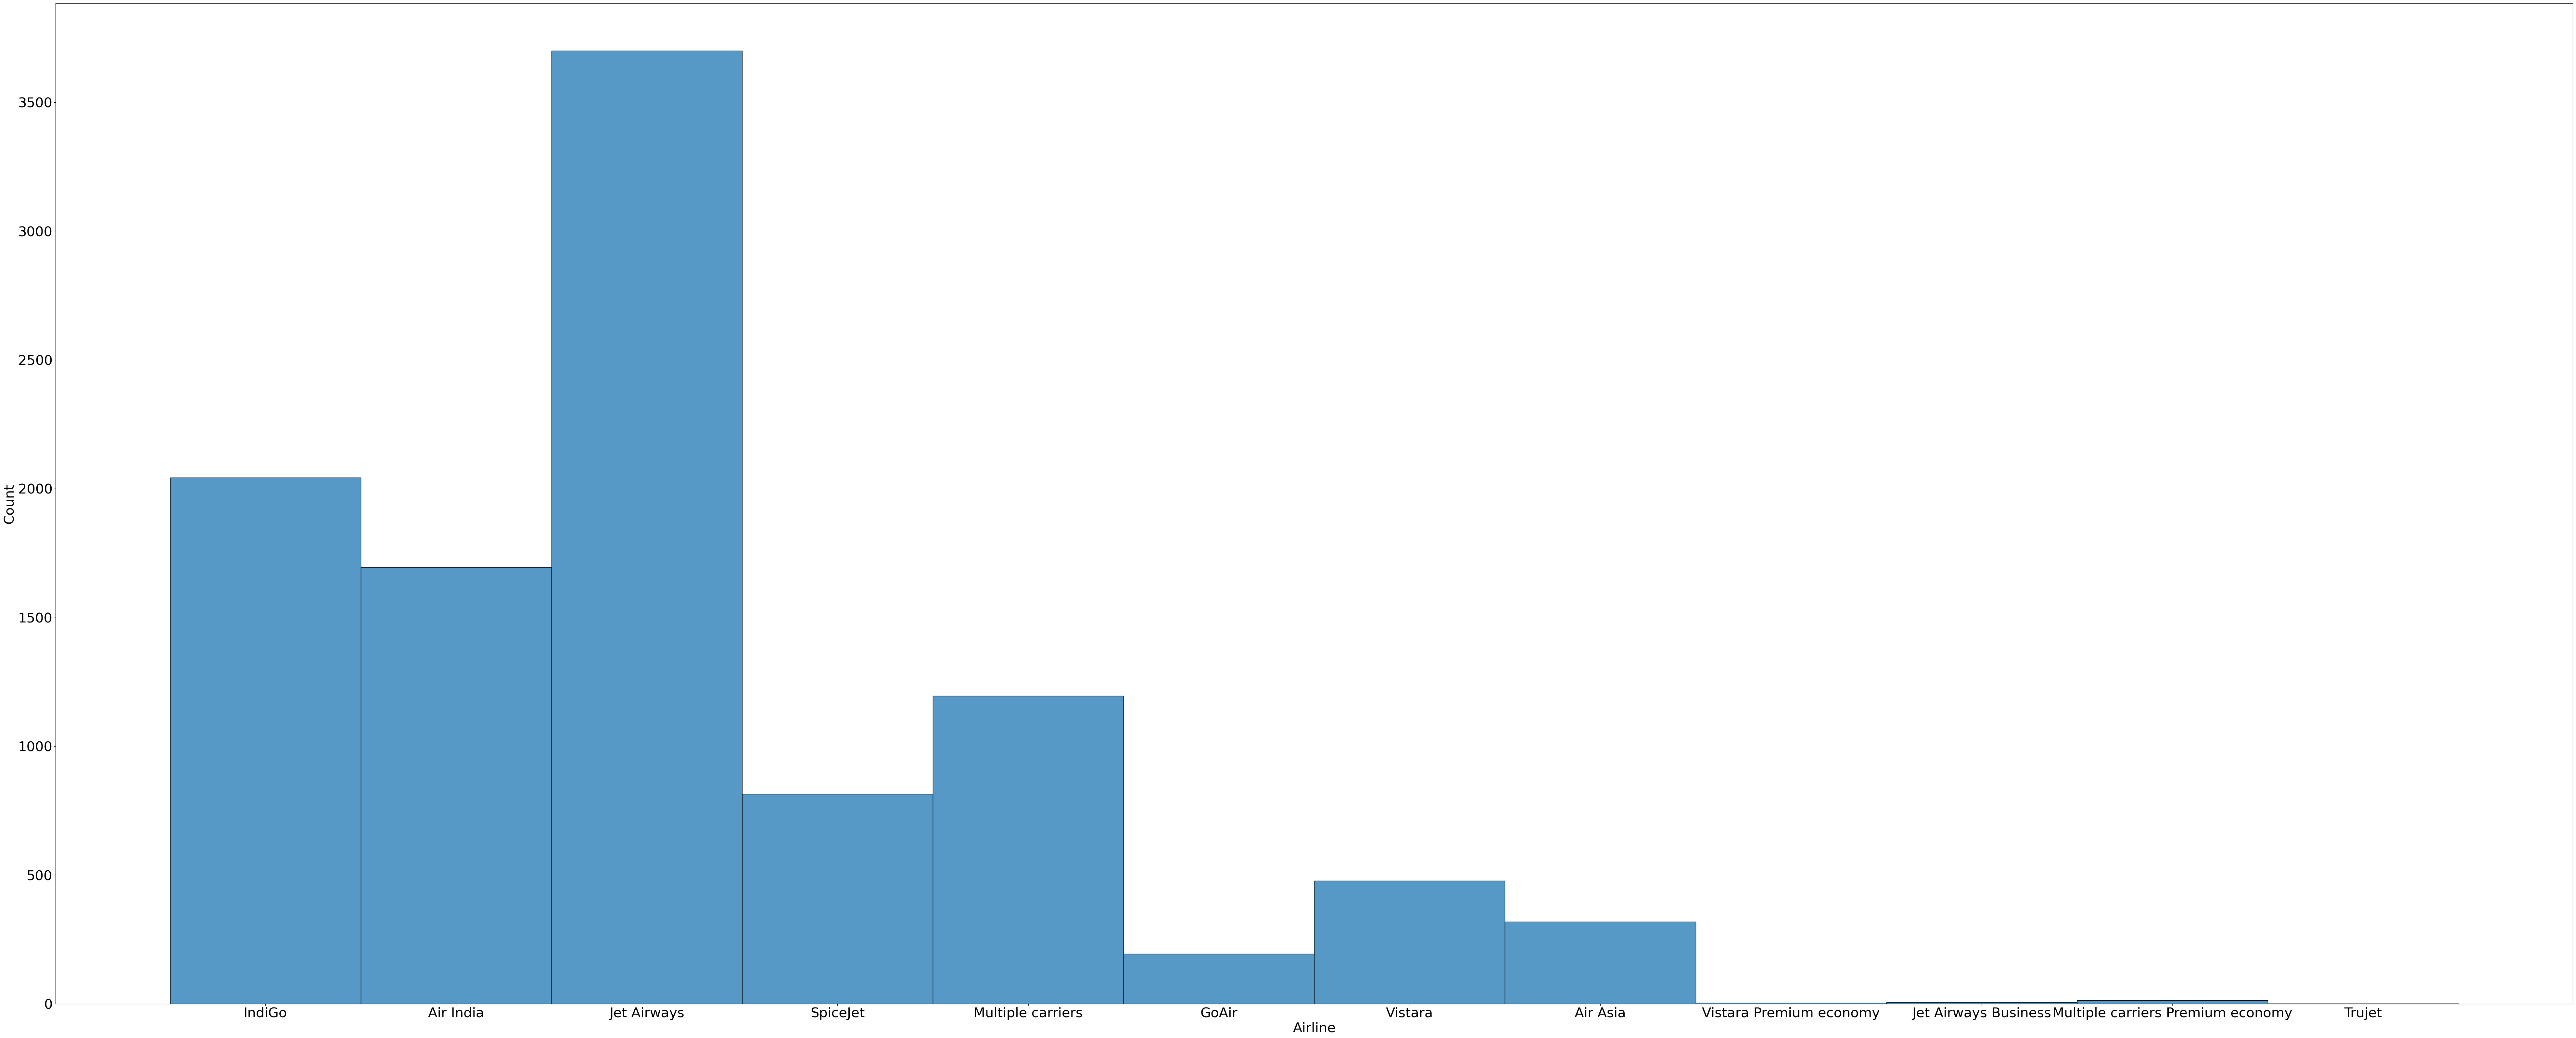

In [183]:
plt.figure(figsize=(100,40))
sns.histplot(data,x='Airline')
plt.show()

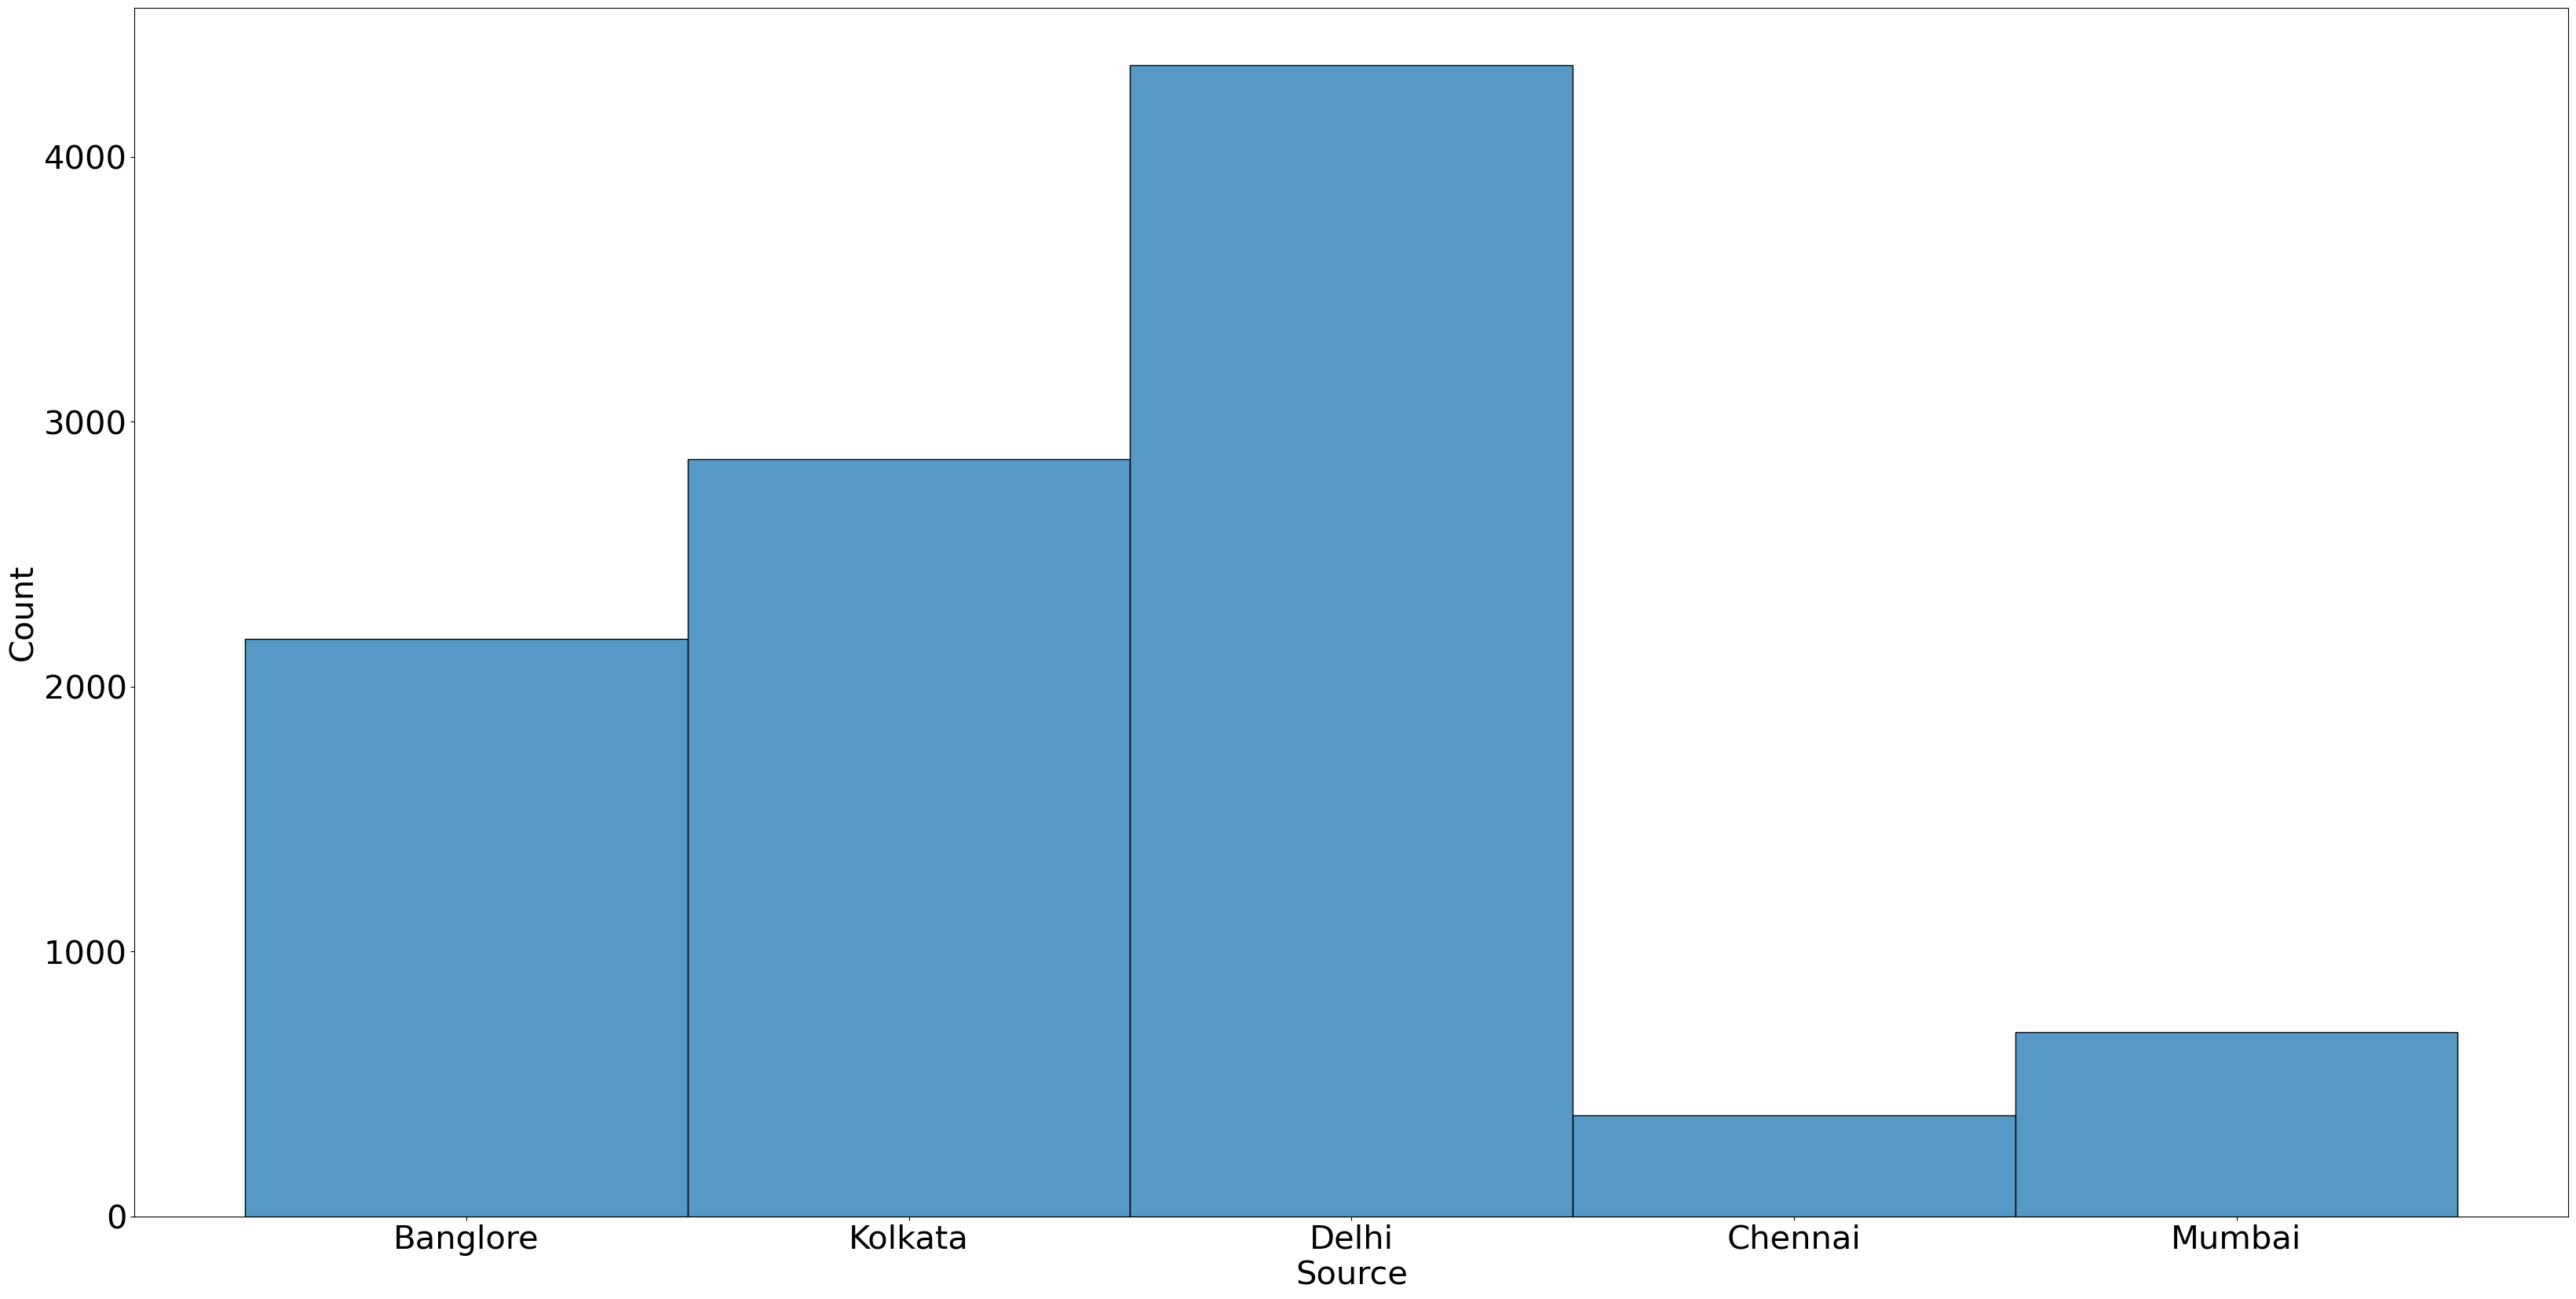

In [184]:
plt.figure(figsize=(40,20))
sns.histplot(data,x='Source')
plt.show()

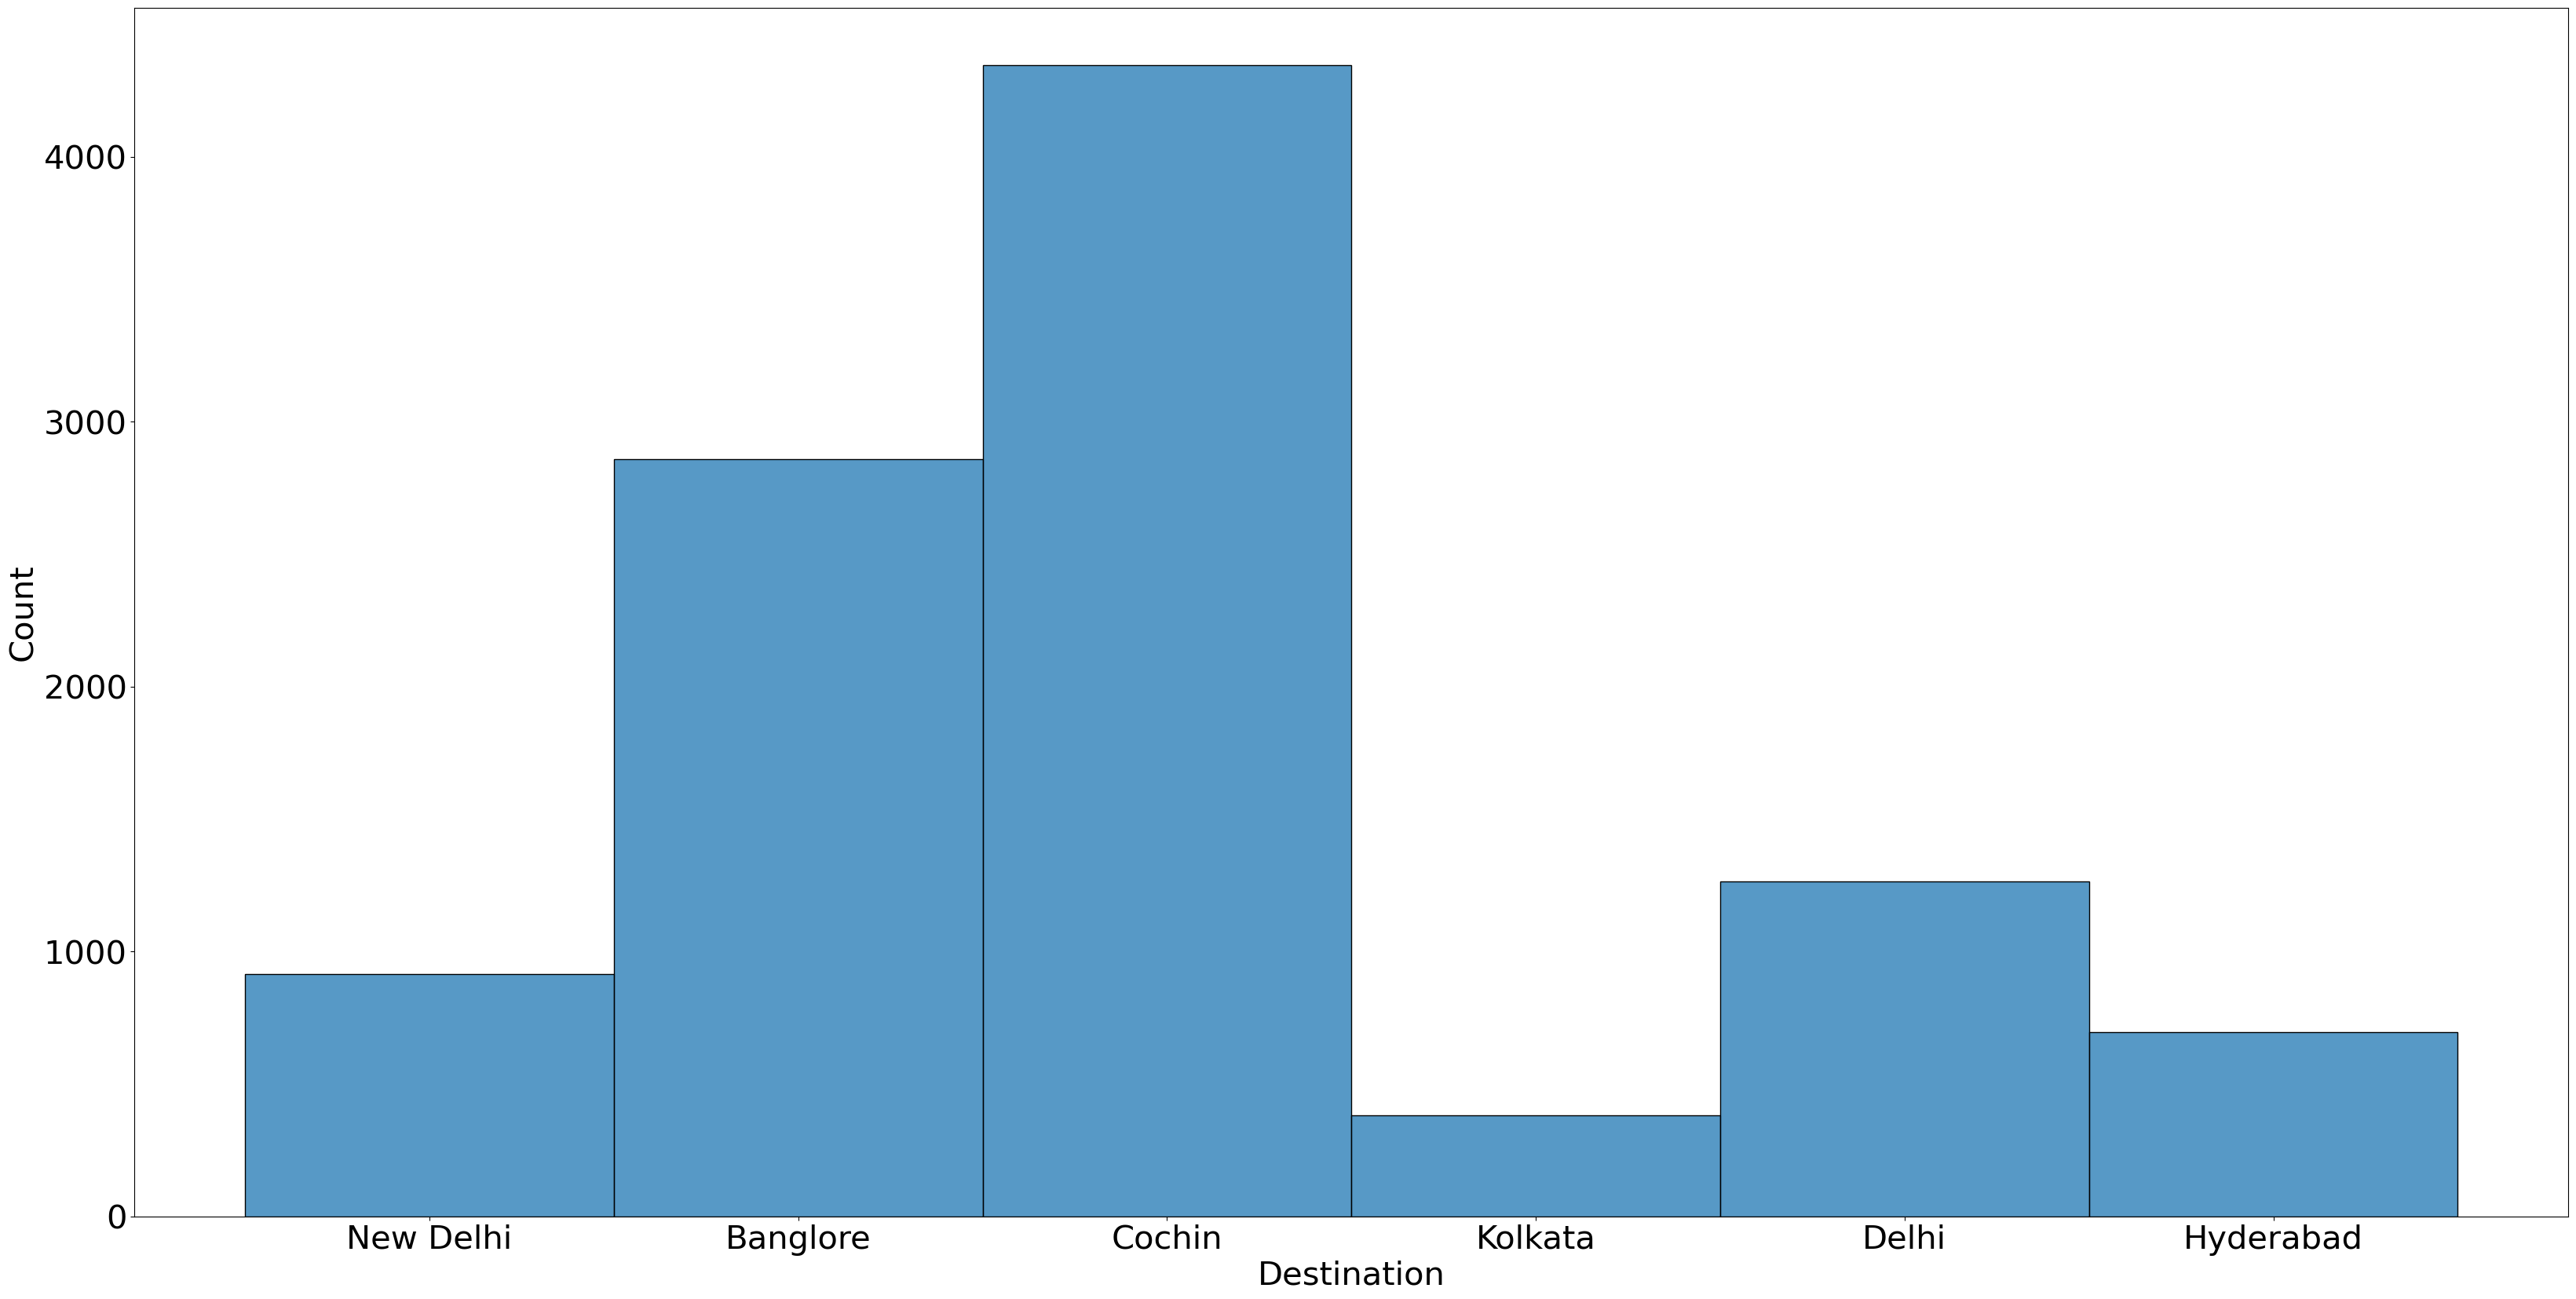

In [185]:
plt.figure(figsize=(40,20))
sns.histplot(data,x='Destination')
plt.show()

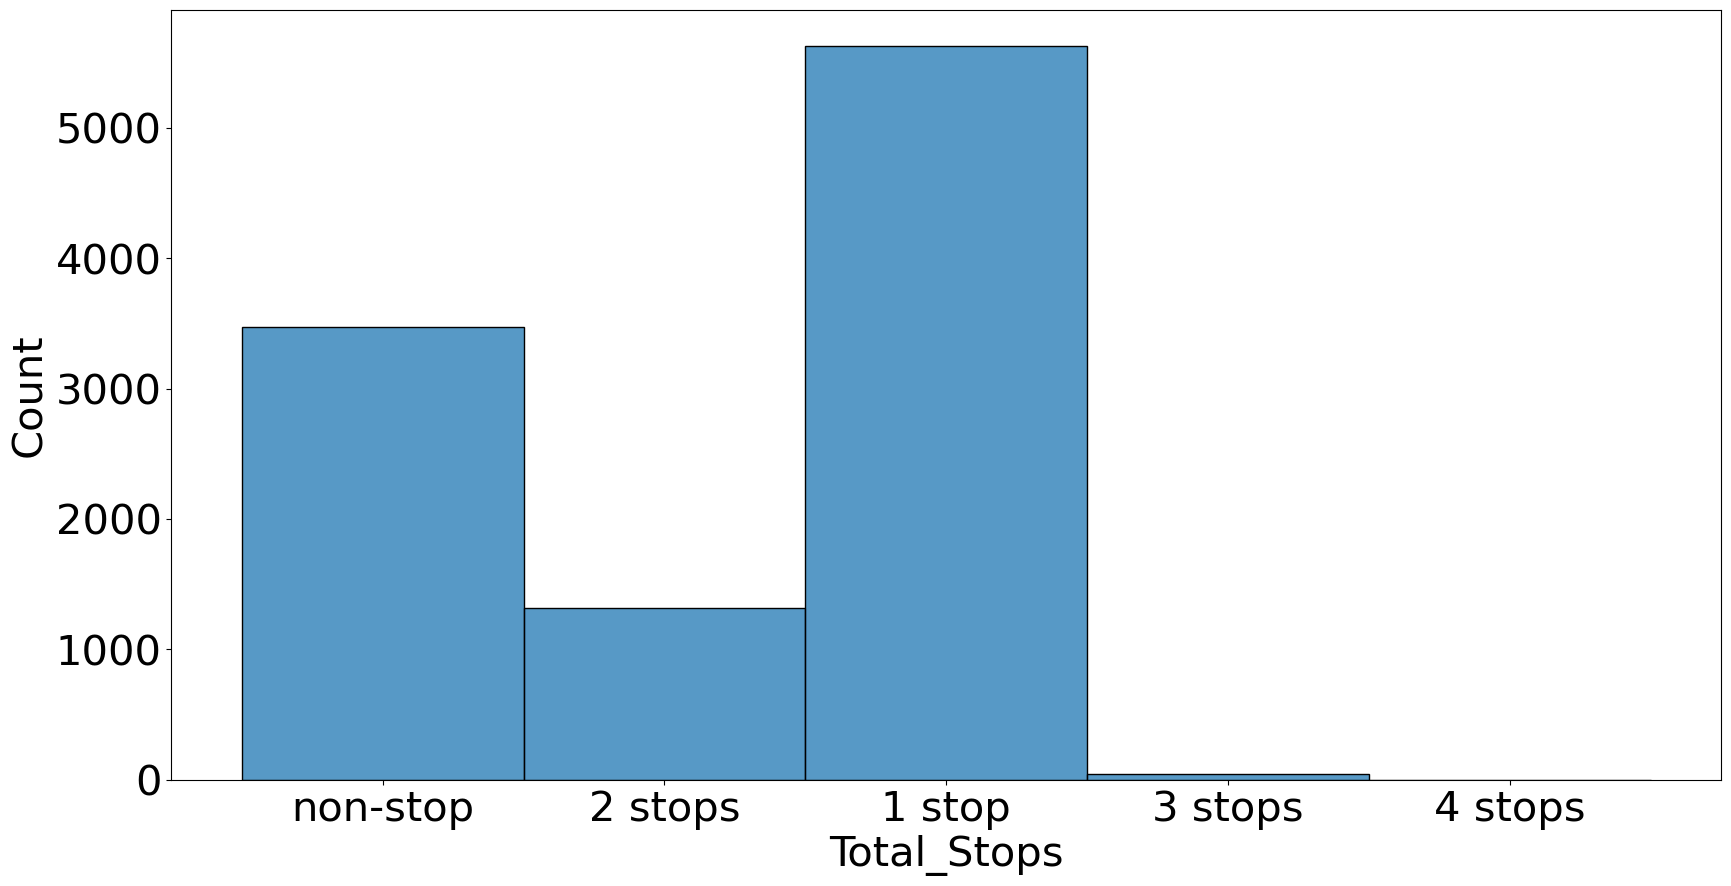

In [186]:
plt.figure(figsize=(20,10))
sns.histplot(data,x='Total_Stops')
plt.show()

### 5.2. Bivariate Analysis

#### 5.2.1. Bar Chart

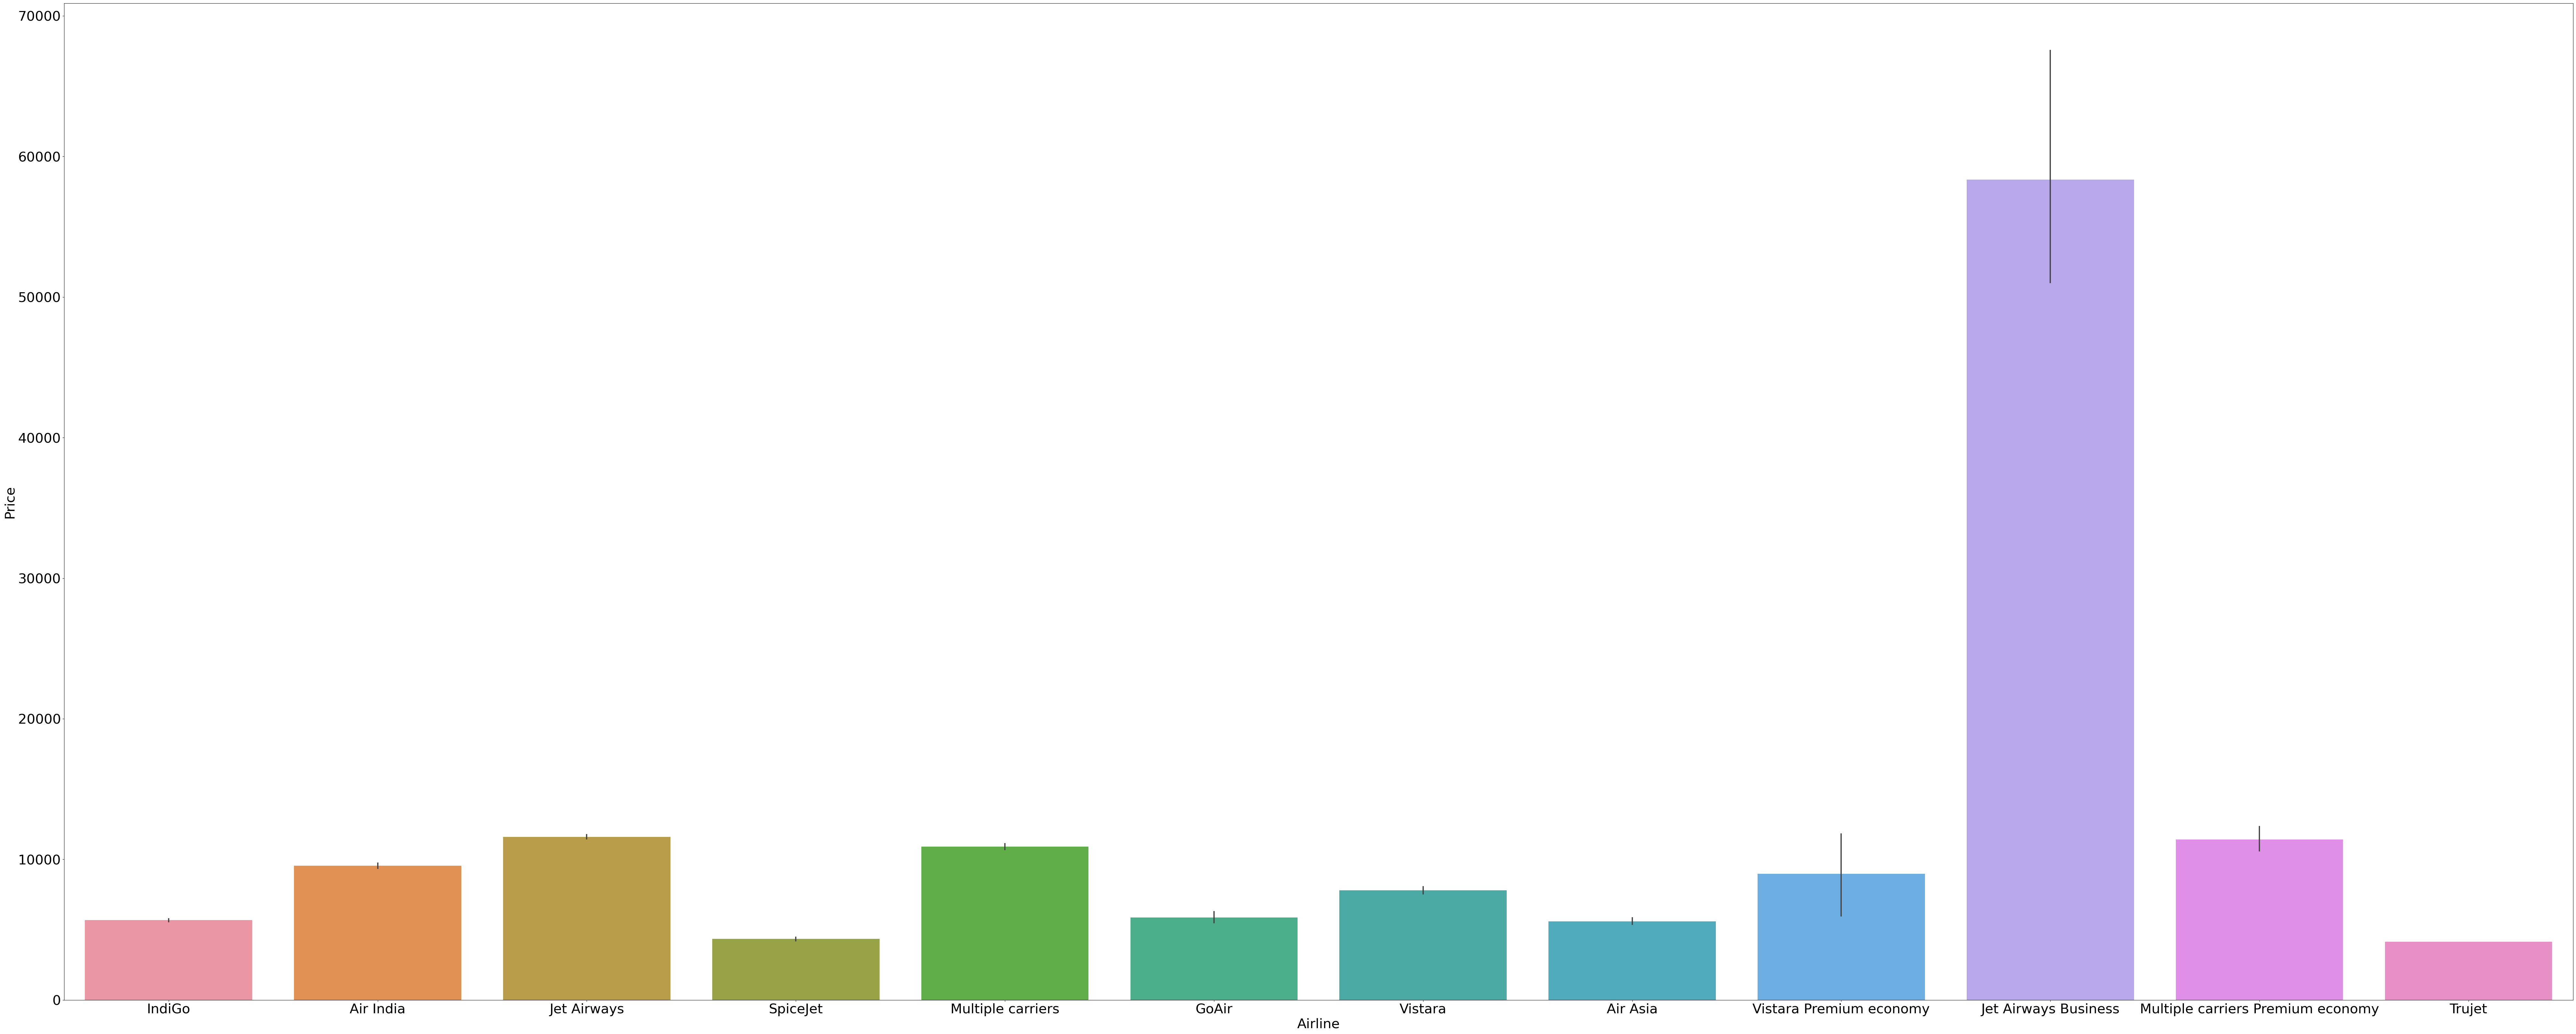

In [187]:
plt.figure(figsize=(100,40))
sns.barplot(data,x='Airline',y='Price')
plt.show()

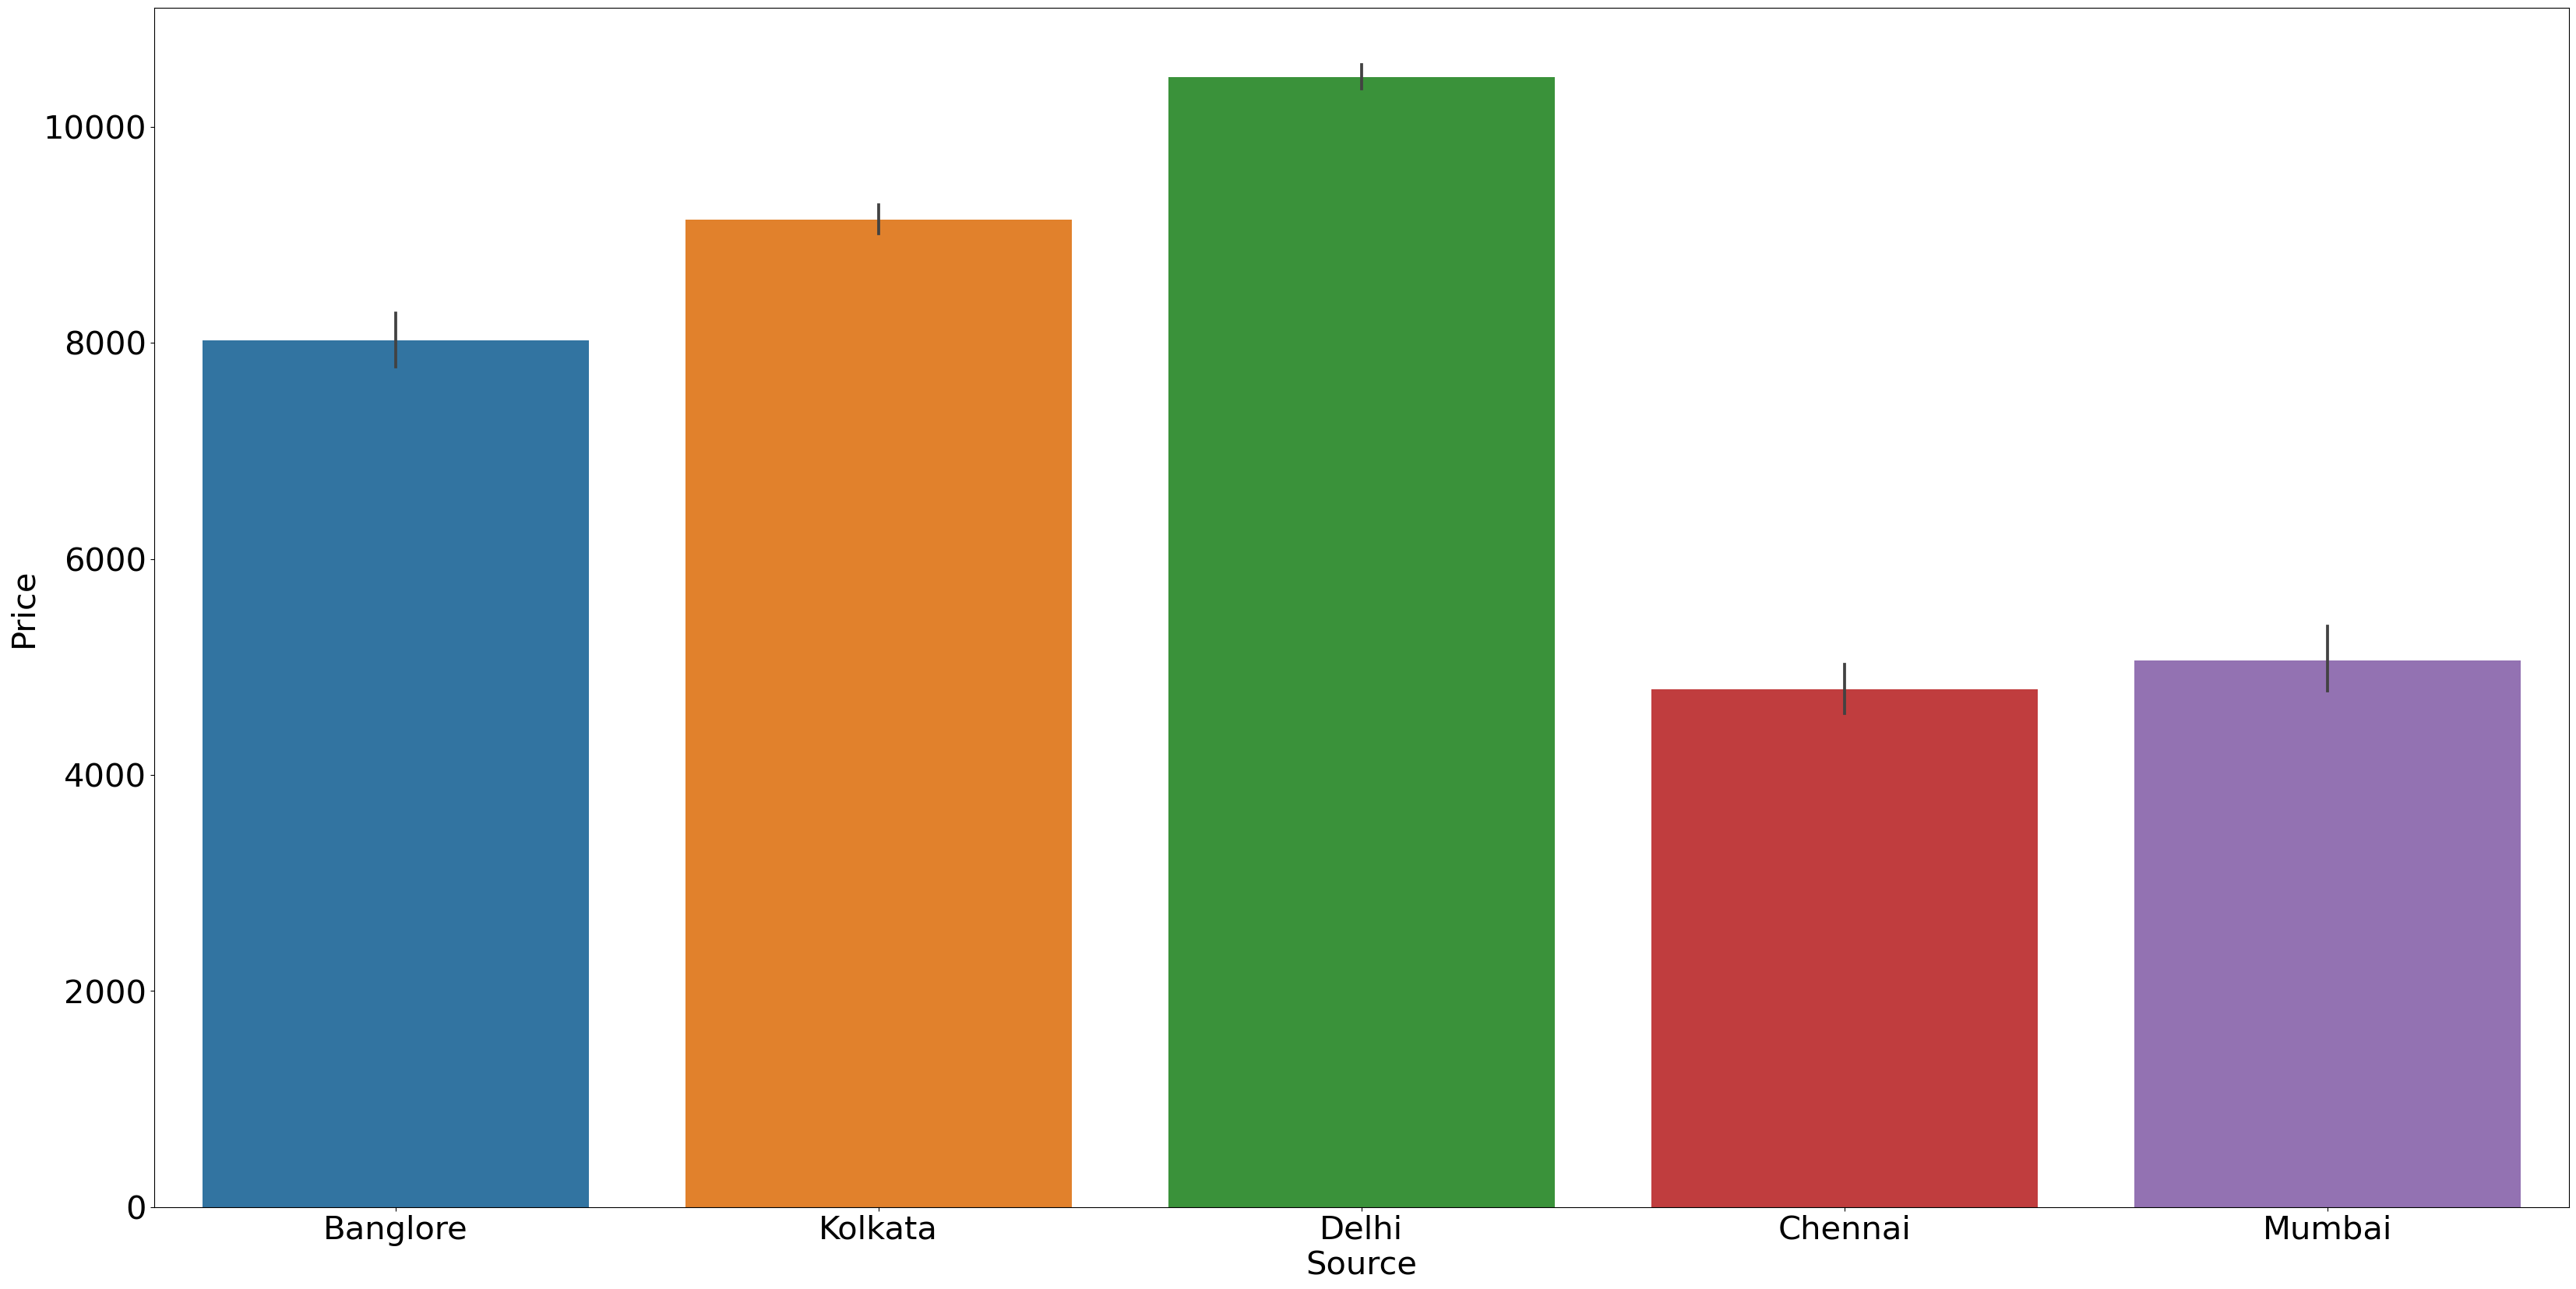

In [188]:
plt.figure(figsize=(40,20))
sns.barplot(data,x='Source',y='Price')
plt.show()

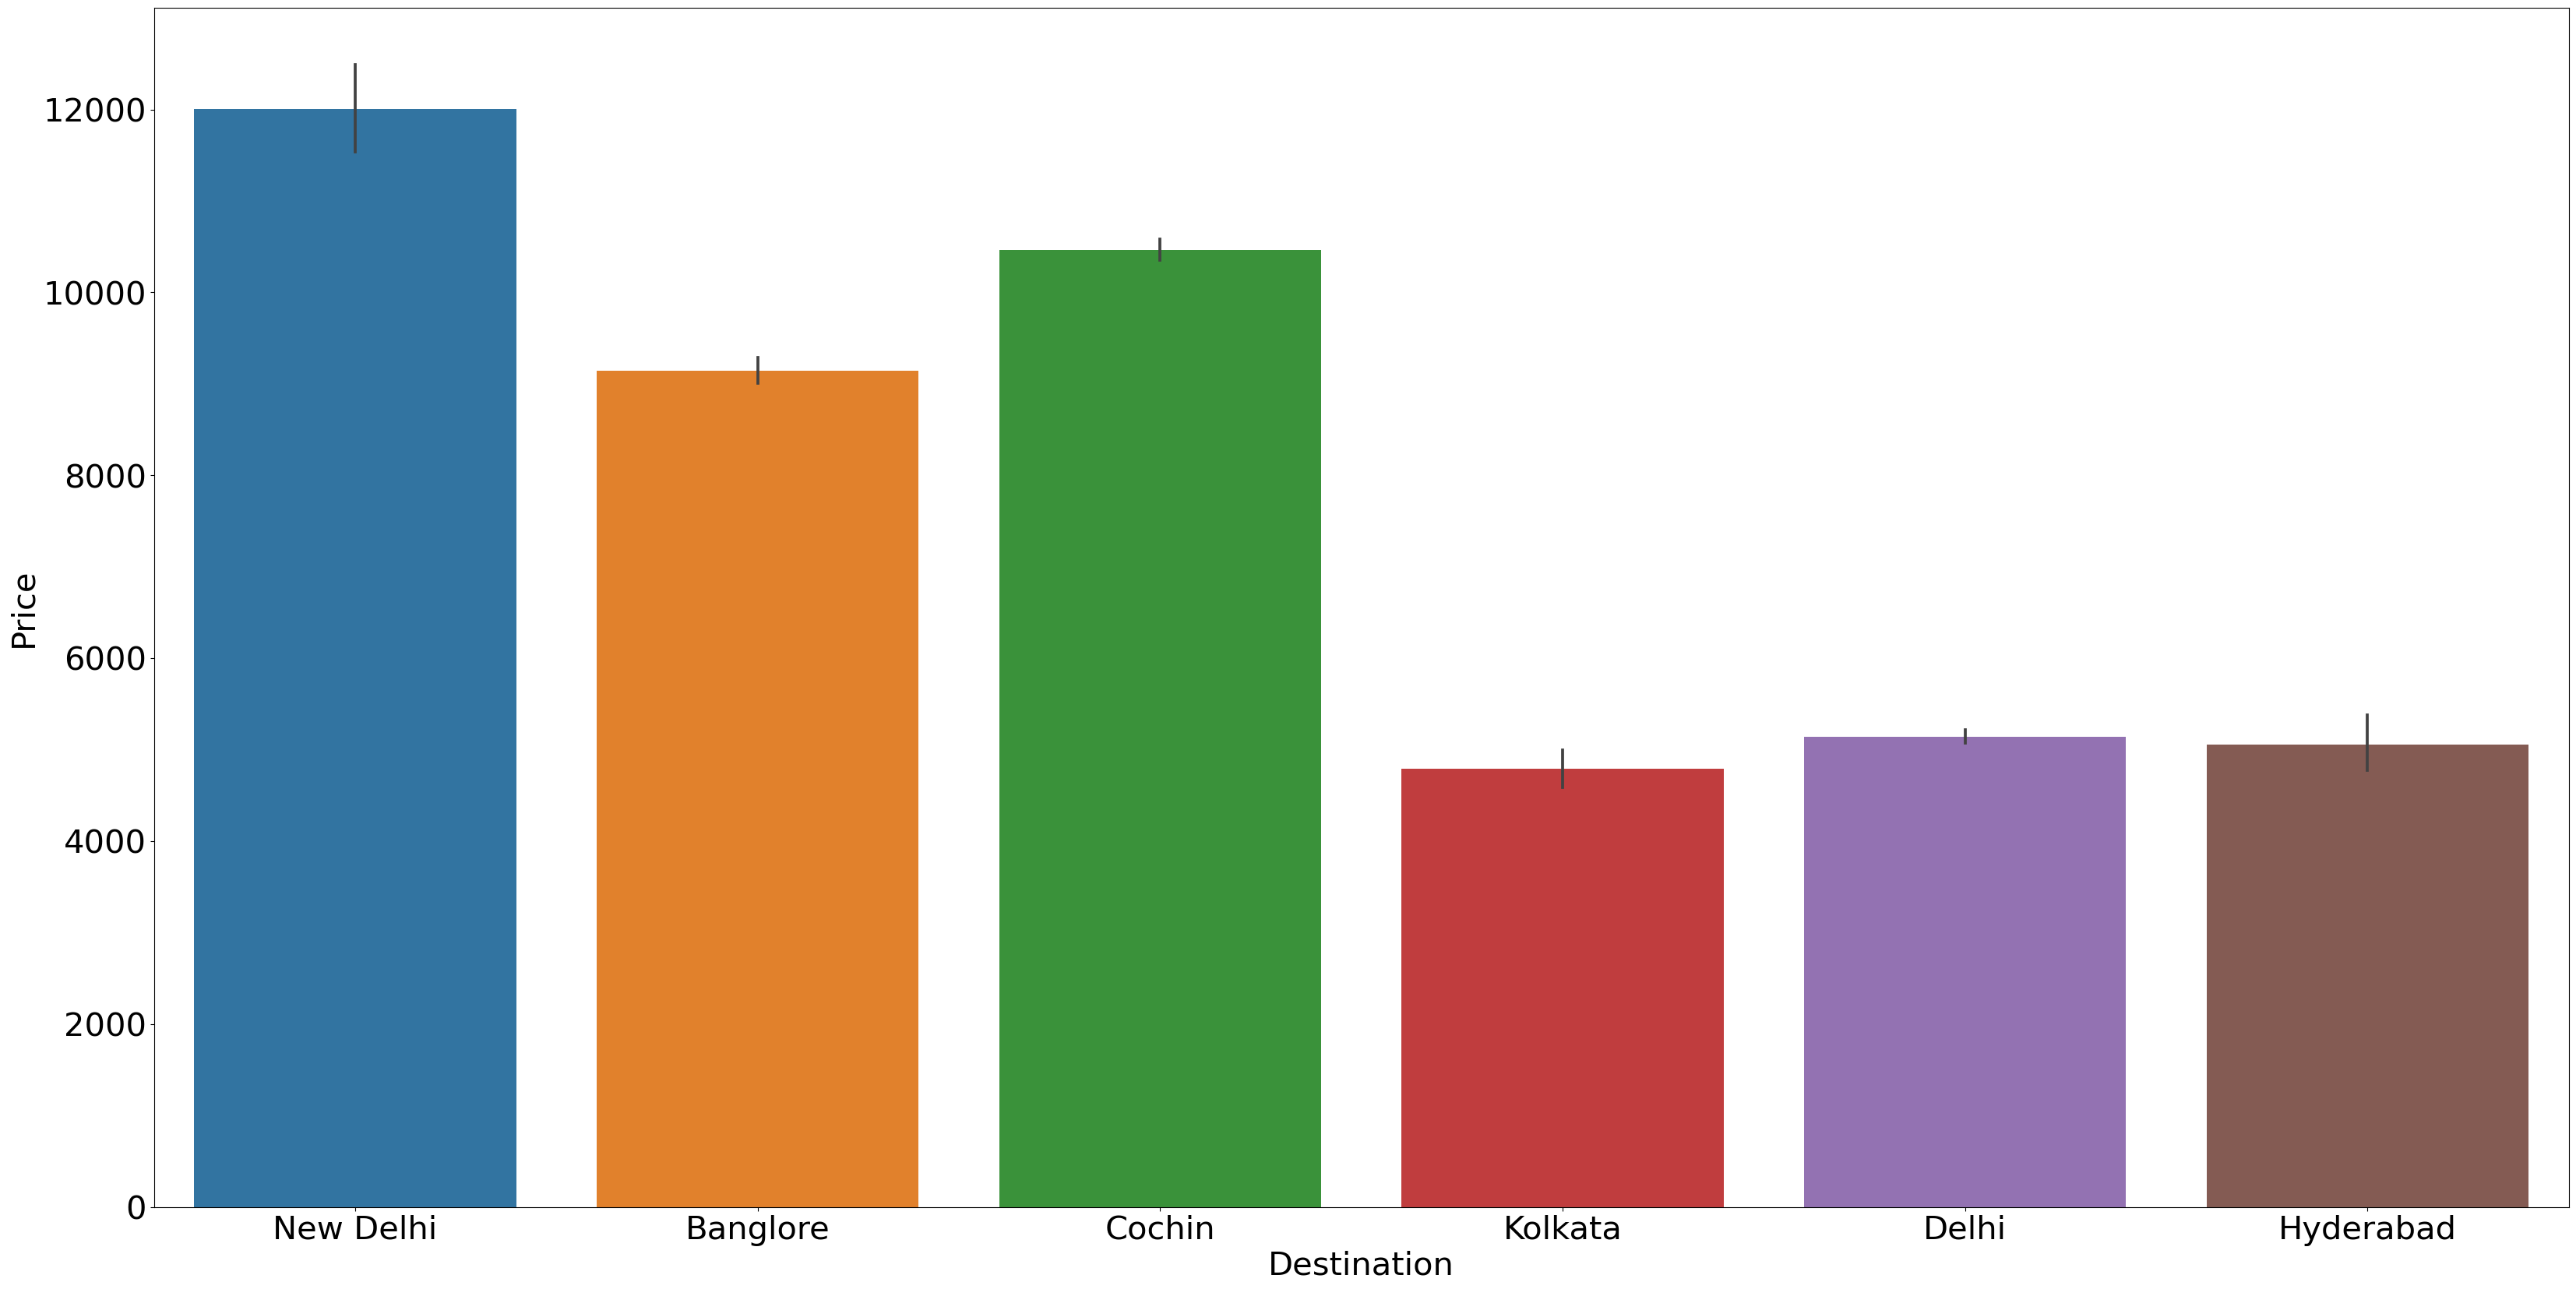

In [189]:
plt.figure(figsize=(40,20))
sns.barplot(data,x='Destination',y='Price')
plt.show()

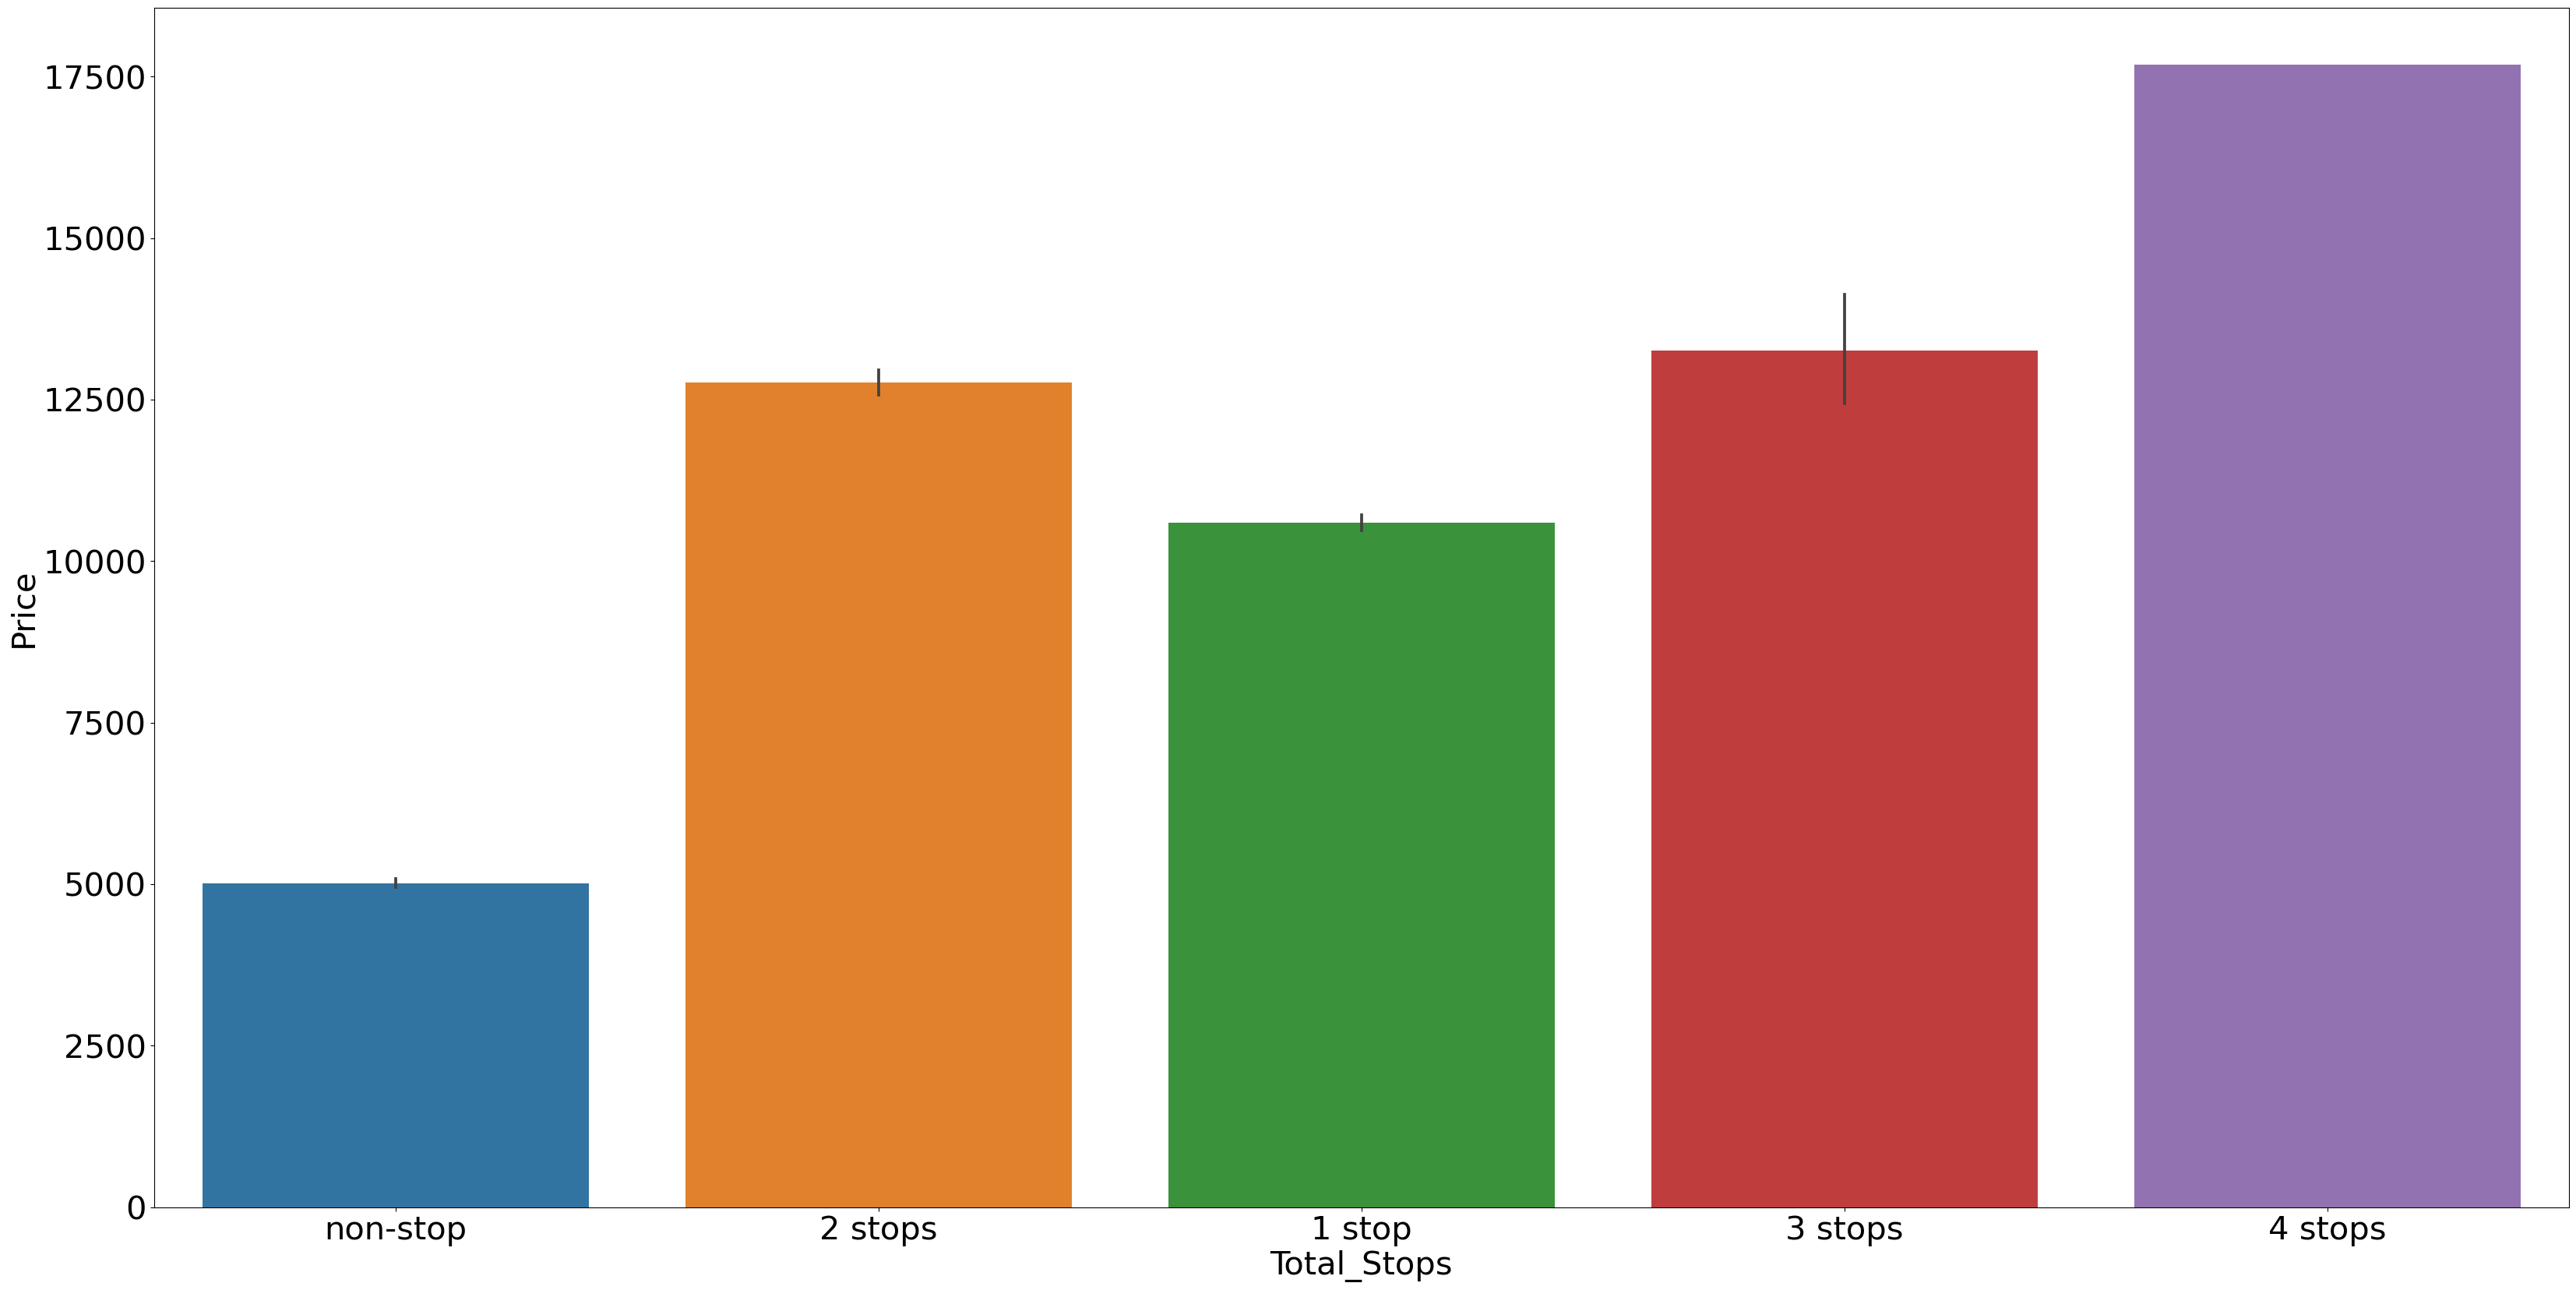

In [190]:
plt.figure(figsize=(40,20))
sns.barplot(data,x='Total_Stops',y='Price')
plt.show()

###### Insights
1. Jet Airways Business' fare  is high compared to others
2. Fare is high for the Source Delhi 
3. Fare is high for the Destination New Delhi 
4. The flight stops in more Airport collects more fare and the flights has no stops in between collects less fare  

### 6. DATA PREPROCESSING

### 6.1. Null values handling

In [191]:
# Checking for null vales in the data
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

###### Insights
The column 'Route' has 1 null value and the column 'Total_stops' has 1 null value.

In [192]:
# Locating the null value row in the 'Route' coulmn
data.loc[data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [193]:
# Locating the null value row in the 'Total_Stops' coulmn
data.loc[data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [194]:
# Finding mode for the 'Route' column
mode_Route=data.Route.mode()[0]

In [195]:
# Finding mode for the 'Total_Stops' column
mode_Total_Stops=data.Total_Stops.mode()[0]

In [196]:
# Filling the null value in the 'Route' by its mode
data.Route.fillna(mode_Route,inplace=True)

In [197]:
# Filling the null value in the 'Total_Stops' by its mode
data.Total_Stops.fillna(mode_Total_Stops,inplace=True)

In [198]:
data.isnull().sum()
# The null values are handled and Now there is no null values in the data

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### 6.2. Encoding Categorical features

#### 6.2.1. OneHotEncoding

The columns 'Airline', 'Source', 'Destination', 'Additional_Info' are nominal features. So we do OneHotEncoding for these features. 

##### 6.2.1.1. Airline

In [199]:
# Initializing OneHotEncoder
onehotencoder_Airline=OneHotEncoder()

In [200]:
# Fit and tranforming the 'Airline' column
Airline_encoded=onehotencoder_Airline.fit_transform(data[['Airline']]).toarray()

In [201]:
# Getting OneHotEncoder output features names
onehotencoder_Airline.get_feature_names_out()

array(['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara',
       'Airline_Vistara Premium economy'], dtype=object)

In [202]:
# Creating a DataFrame of encoded array
Airline_encoded_df=pd.DataFrame(Airline_encoded,index=data.index,columns=['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara',
       'Airline_Vistara Premium economy'])

In [203]:
# Removing the columns having less value_counts in 'Airline' 
Airline_encoded_df.drop(['Airline_Multiple carriers Premium economy','Airline_Jet Airways Business','Airline_Vistara Premium economy','Airline_Trujet'],axis=1,inplace=True)

In [204]:
# concatenating Airline_encoded_df and data and storing it to the data
data=pd.concat([Airline_encoded_df,data],axis=1)

In [205]:
# Removing the 'Airline' column from the data
data.drop('Airline',axis=1,inplace=True)

##### 6.2.1.2. Source

In [206]:
# Initializing OneHotEncoder
onehotencoder_Source=OneHotEncoder()

In [207]:
# Fit and tranforming the 'Source' column
Source_encoded=onehotencoder_Source.fit_transform(data[['Source']]).toarray()

In [208]:
# Getting OneHotEncoder output features names
onehotencoder_Source.get_feature_names_out()

array(['Source_Banglore', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai'], dtype=object)

In [209]:
# Creating a DataFrame of encoded array
Source_encoded_df=pd.DataFrame(Source_encoded,index=data.index,columns=['Source_Banglore', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai'])

In [210]:
# Dropping first column from Source_encoded_df
Source_encoded_df.drop('Source_Banglore',axis=1,inplace=True)

In [211]:
# concatenating Source_encoded_df and data and storing it to the data
data=pd.concat([Source_encoded_df,data],axis=1)

In [212]:
# Removing the 'Source' column from the data
data.drop('Source',axis=1,inplace=True)

##### 6.2.1.3. Destination

In [213]:
# Initializing OneHotEncoder
onehotencoder_Destination=OneHotEncoder()

In [214]:
# Fit and tranforming the 'Destination' column
Destination_encoded=onehotencoder_Destination.fit_transform(data[['Destination']]).toarray()

In [215]:
# Getting OneHotEncoder output features names
onehotencoder_Destination.get_feature_names_out()

array(['Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'], dtype=object)

In [216]:
# Creating a DataFrame of encoded array
Destination_encoded_df=pd.DataFrame(Destination_encoded,index=data.index,columns=['Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'])

In [217]:
# Dropping first column from Destination_encoded_df
Destination_encoded_df.drop('Destination_Banglore',axis=1,inplace=True)

In [218]:
# concatenating Destination_encoded_df and data and storing it to the data
data=pd.concat([Destination_encoded_df,data],axis=1)

In [219]:
# Removing the 'Destination' column from the data
data.drop('Destination',axis=1,inplace=True)

##### 6.2.1.4. Additional_Info

In [220]:
# Initializing OneHotEncoder
onehotencoder_Additional_Info=OneHotEncoder()

In [221]:
# Fit and tranforming the 'Additional_Info' column
Additional_Info_encoded=onehotencoder_Additional_Info.fit_transform(data[['Additional_Info']]).toarray()

In [222]:
# Getting OneHotEncoder output features names
onehotencoder_Additional_Info.get_feature_names_out()

array(['Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover',
       'Additional_Info_2 Long layover', 'Additional_Info_Business class',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye flight'],
      dtype=object)

In [223]:
# Creating a DataFrame of encoded array
Additional_Info_encoded_df=pd.DataFrame(Additional_Info_encoded,index=data.index,columns=['Additional_Info_1 Long layover',
       'Additional_Info_1 Short layover',
       'Additional_Info_2 Long layover', 'Additional_Info_Business class',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye flight'])

In [224]:
# Removing the columns having less value_counts in 'Additional_Info' 
Additional_Info_encoded_df.drop(['Additional_Info_No info','Additional_Info_No Info','Additional_Info_1 Short layover','Additional_Info_Red-eye flight','Additional_Info_2 Long layover'],axis=1,inplace=True)

In [225]:
# concatenating Additional_Info_encoded_df and data and storing it to the data
data=pd.concat([Additional_Info_encoded_df,data],axis=1)

In [226]:
# Removing the 'Additional_Info' column from the data
data.drop('Additional_Info',axis=1,inplace=True)

#### 6.2.2. Ordinal encoding

The column 'Total_Stops' contains ordinal data. So we encode this column by manually giving numbers in order.

##### 6.2.2.1. Total_Stops

In [227]:
# Creating a dictionary for replacing the objects to numeric
Total_Stops_encoding={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [228]:
# Replacing with numeric value
data.Total_Stops.replace(Total_Stops_encoding,inplace=True)

#### 6.2.3. Label encoding

The column 'Route' contains nominal data. So we encode this column by LabelEncoder.

##### 6.2.3.1. Route

In [229]:
# Initializing LabelEncoder
label_encoder_Route=LabelEncoder()

In [230]:
# Fit and tranforming the 'Route' column
data['Route']=label_encoder_Route.fit_transform(data['Route'])

#### 6.2.4. Datetime encoding

The columns 'Duration', 'Date_of_Journey', 'Dep_Time', 'Arrival_Time' contains datatime data in object format. So we will convert that into datetime format.

##### 6.2.4.1. Duration

In [231]:
# Converting 'Duration' column to numeric by pandas to_timedelta function 
data['Duration']=pd.to_timedelta(data['Duration']).dt.seconds//60

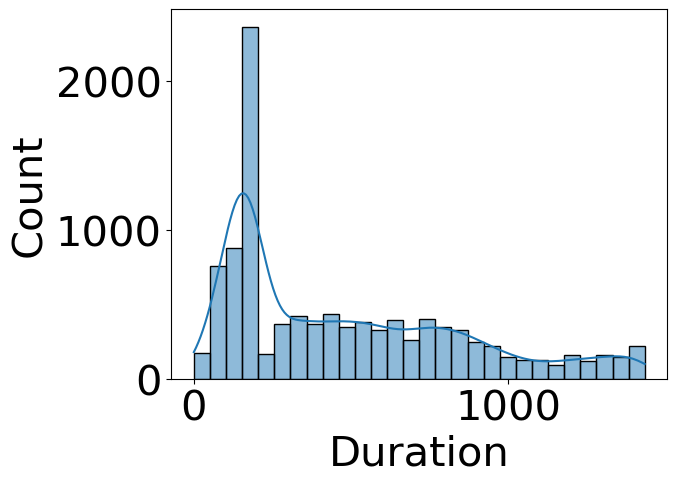

In [232]:
# Visualizing the distribution of 'Duration' column by seaborn histplot 
sns.histplot(data.Duration,kde=True)
plt.show()

In [233]:
# Initializing MinMaxScaler
minmaxscaler_Duration=MinMaxScaler()

In [234]:
# Fit and tranforming the 'Duration' column for scaling the values
data['Duration']=minmaxscaler_Duration.fit_transform(data[['Duration']])

##### 6.2.4.2. Date_of_Journey

In [235]:
# Converting 'Date_of_Journey' column to datetime data by pandas to_datetime function 
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])

In [236]:
# Extracting month from the 'Date_of_Journey' column and adding it to the data
data['Date_of_Journey_month']=data.Date_of_Journey.dt.month

In [237]:
# Extracting day from the 'Date_of_Journey' column and adding it to the data
data['Date_of_Journey_day']=data.Date_of_Journey.dt.day

In [238]:
# Removing 'Date_of_Journey' column from the data
data.drop('Date_of_Journey',axis=1,inplace=True)

##### 6.2.4.3. Dep_Time

In [239]:
# Converting 'Dep_Time' column to datetime data by pandas to_datetime function and Extracting hour from the 'Dep_Time' column.
Dep_Time_hour=pd.to_datetime(data['Dep_Time']).dt.hour

In [240]:
# Converting 'Dep_Time' column to datetime data by pandas to_datetime function and Extracting minute from the 'Dep_Time' column and converting it to hour by diving 60.
Dep_Time_minute=pd.to_datetime(data['Dep_Time']).dt.minute/60

In [241]:
# Adding the hours and minutes and adding it to the data
data['Dep_Time']=Dep_Time_hour+Dep_Time_minute

In [242]:
# To scale the values in 'Dep_Time', Dividing it by 24
data['Dep_Time']=data['Dep_Time']/24

##### 6.2.4.4. Arrival_Time

In [243]:
# Converting 'Arrival_Time' column to datetime data by pandas to_datetime function and Extracting hour from the 'Arrival_Time' column.
Arrival_Time_hour=pd.to_datetime(data['Arrival_Time']).dt.hour

In [244]:
# Converting 'Arrival_Time' column to datetime data by pandas to_datetime function and Extracting minute from the 'Arrival_Time' column and converting it to hour by diving 60.
Arrival_Time_minute=pd.to_datetime(data['Arrival_Time']).dt.minute/60

In [245]:
# Adding the hours and minutes and adding it to the data
data['Arrival_Time']=Arrival_Time_hour+Arrival_Time_minute

In [246]:
# To scale the values in 'Arrival_Time', Dividing it by 24
data['Arrival_Time']=data['Arrival_Time']/24

### 6.3. Correlation

In [247]:
# Checking correlation for the data
correlation=data.corr()

In [248]:
# Visualizing the correlation of the data in dataframe 
correlation

,Additional_Info_1 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,...,Airline_SpiceJet,Airline_Vistara,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey_month,Date_of_Journey_day
Additional_Info_1 Long layover,1.000000,-0.000834,-0.001104,-0.020259,-0.007551,-0.031396,-0.015818,-0.011395,-0.008291,0.129913,...,-0.004020,-0.009332,-0.069324,0.005100,-0.000391,0.040705,0.012762,0.120668,-0.056578,-0.056682
Additional_Info_Business class,-0.000834,1.000000,-0.000506,-0.009289,-0.003462,-0.016484,-0.007252,-0.005224,-0.003802,0.063211,...,-0.005684,-0.004279,-0.034253,-0.020865,-0.003308,-0.006851,0.005852,0.202076,-0.028595,-0.028785
Additional_Info_Change airports,-0.001104,-0.000506,1.000000,-0.012290,-0.004581,-0.021809,-0.009595,-0.006912,-0.005030,0.083632,...,-0.007520,-0.005661,-0.038471,-0.011144,0.021904,0.004460,0.046913,0.043497,-0.037832,-0.038084
Additional_Info_In-flight meal not included,-0.020259,-0.009289,-0.012290,1.000000,-0.084094,0.026024,-0.039228,-0.027991,-0.092335,-0.006329,...,-0.138050,-0.103924,-0.008937,0.066138,-0.013183,0.174776,0.101802,0.042009,0.073299,0.036823
Additional_Info_No check-in baggage included,-0.007551,-0.003462,-0.004581,-0.084094,1.000000,-0.131156,0.043638,0.073271,0.143916,-0.031113,...,0.609154,-0.038737,-0.044109,-0.006622,-0.090941,-0.158476,-0.201568,-0.206133,0.016705,0.033531
Destination_Cochin,-0.031396,-0.016484,-0.021809,0.026024,-0.131156,1.000000,-0.312589,-0.225182,-0.163857,-0.260777,...,-0.182023,-0.142624,0.745469,-0.130062,-0.009848,0.324450,0.474480,0.261426,0.130865,0.095772
Destination_Delhi,-0.015818,-0.007252,-0.009595,-0.039228,0.043638,-0.312589,1.000000,-0.099073,-0.072092,-0.114734,...,0.042075,0.102787,-0.568719,0.010622,-0.029627,-0.308009,-0.450462,-0.311370,0.093861,0.004707
Destination_Hyderabad,-0.011395,-0.005224,-0.006912,-0.027991,0.073271,-0.225182,-0.099073,1.000000,-0.051933,-0.082652,...,0.096833,-0.016232,-0.193629,-0.014858,-0.032285,-0.241396,-0.260674,-0.229168,-0.038194,-0.012736
Destination_Kolkata,-0.008291,-0.003802,-0.005030,-0.092335,0.143916,-0.163857,-0.072092,-0.051933,1.000000,-0.060143,...,0.187187,0.062542,0.279165,-0.010914,-0.017387,-0.178018,-0.236129,-0.178100,0.006893,0.007761
Destination_New Delhi,0.129913,0.063211,0.083632,-0.006329,-0.031113,-0.260777,-0.114734,-0.082652,-0.060143,1.000000,...,-0.038136,0.018228,-0.523071,-0.016076,-0.002868,0.019814,-0.000179,0.199419,-0.452368,-0.075946


###### Insights
1. The only continuos column in this data after encoding is 'Duration'.
2. The 'Duration' column has correlation 0.450332 with the 'Price' column
3. The discrete column 'Total_Stops' correlated 0.601997 with 'Price' column 

In [249]:
# Final preprocessed data for Training the model
data.head()

,Additional_Info_1 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,...,Airline_SpiceJet,Airline_Vistara,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey_month,Date_of_Journey_day
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,18,0.930556,0.048611,0.118467,0,3897,3,24
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,84,0.243056,0.552083,0.310105,2,7662,5,1
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,118,0.392361,0.184028,0.794425,2,13882,6,9
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,91,0.753472,0.979167,0.226481,1,6218,5,12
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,29,0.701389,0.899306,0.198606,1,13302,3,1


### 7. DATA SPLITTING

In [250]:
# Extracting features from the data
X=data.drop('Price',axis=1)

In [251]:
# Extracting target from the data
y=data['Price']

In [252]:
# Splitting training and testing data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

### 8. MODEL TRAINING

#### 8.1. LINEAR REGRESSION

In [253]:
# Initializing LinearRegression model
linear_model=LinearRegression()

# Fitting the training data to the Linear Regression model
linear_model.fit(x_train,y_train)

# predicting the target for testing data
y_pred=linear_model.predict(x_test)

In [254]:
# Evaluating the LinearRegression model's performance by R2_score and Adjusted R2_score

R2=r2_score(y_test,y_pred)
k=len(X.columns)
n=len(data)
Adjusted_R2=1-((1-R2)*(n-1)/(n-k-1))
print('The R2_score is ',R2)
print('The Adjusted R2_score is ',Adjusted_R2)

The R2_score is  0.6914623458957886
The Adjusted R2_score is  0.6906047218213113


In [255]:
# R2 score for Linear regression model
linear_regression_r2_score=R2

#### 8.2. SUPPORT VECTOR MACHINE(SVM)

In [208]:
# Initializing SVR model
model=SVR()

# Fitting the training data to the SVR model
model.fit(x_train,y_train)

# predicting the target for testing data
y_pred=model.predict(x_test)

In [209]:
# Evaluating the SVR model's performance by R2_score and Adjusted R2_score

R2=r2_score(y_test,y_pred)
k=len(X.columns)
n=len(data)
Adjusted_R2=1-((1-R2)*(n-1)/(n-k-1))
print('The R2_score is ',R2)
print('The Adjusted R2_score is ',Adjusted_R2)

The R2_score is  0.008290307965706512
The Adjusted R2_score is  0.005533710527865443


##### 8.2.1. Hyperparameter tuning for Support Vector Machine(SVM)

In [91]:
# Initializing SVR model
model_ht=SVR()

In [93]:
# Creating a dictionary with possible Hyperparameters
params={'kernel':['linear', 'poly', 'rbf'],
        'degree':[1,2,3,4,5],
        'gamma':['scale', 'auto'],
        'C':[0.1, 1, 10, 100]
        }

In [94]:
# Initializing RandomizedSearchCV
svm_cv=RandomizedSearchCV(estimator=model_ht,
                          param_distributions=params,
                          scoring='r2',
                          n_jobs=-1,
                          cv=5,
                          verbose=3
                      
                     )

In [95]:
# Fitting the training data to the RandomizedSearchCV
svm_cv.fit(x_train,y_train)#started 09:50 # random state 25 in train test split

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   scoring='r2', verbose=3)

In [96]:
# Getting best hyperparameters
svm_cv.best_params_

{'kernel': 'poly', 'gamma': 'auto', 'degree': 3, 'C': 10}

###### 8.2.2. Best SVR Model

In [265]:
# Initializing SVR model
svm_model=SVR(kernel='poly',gamma='auto',degree=3,C=10)

# Fitting the training data to the SVR model
svm_model.fit(x_train,y_train)

# predicting the target for testing data
y_pred=svm_model.predict(x_test)

In [266]:
# Evaluating the SVR model's performance by R2_score and Adjusted R2_score

R2=r2_score(y_test,y_pred)
k=len(X.columns)
n=len(data)
Adjusted_R2=1-((1-R2)*(n-1)/(n-k-1))
print('The R2_score is ',R2)
print('The Adjusted R2_score is ',Adjusted_R2)

The R2_score is  0.6074185074001887
The Adjusted R2_score is  0.6063272715825528


In [267]:
# R2 score for SVR model
svm_r2_score=R2

#### 8.3. DECISION TREE

In [210]:
# Initializing DecisionTreeRegressor model
model=DecisionTreeRegressor()

# Fitting the training data to the DecisionTreeRegressor model
model.fit(x_train,y_train)

# predicting the target for testing data
y_pred=model.predict(x_test)

In [211]:
# Evaluating the DecisionTreeRegressor model's performance by R2_score and Adjusted R2_score

R2=r2_score(y_test,y_pred)
k=len(X.columns)
n=len(data)
Adjusted_R2=1-((1-R2)*(n-1)/(n-k-1))
print('The R2_score is ',R2)
print('The Adjusted R2_score is ',Adjusted_R2)

The R2_score is  0.8766688078494557
The Adjusted R2_score is  0.8763259913467847


##### 8.3.1. Hyperparameter tuning 1 for Decision Tree

In [198]:
# Initializing DecisionTreeRegressor model
model_ht=DecisionTreeRegressor()

In [133]:
# Creating a dictionary with possible Hyperparameters
params={
        'max_depth':list(range(1,20)),
        'min_samples_split':list(range(1,10)),
        'min_samples_leaf':list(range(1,10)),
        'random_state':list(range(43))
        }

In [134]:
# Initializing GridSearchCV
tree_cv=GridSearchCV(estimator=model_ht,
                    param_grid=params,
                    scoring='r2',
                    n_jobs=-1,
                    cv=3,
                    verbose=3)

In [135]:
# Fitting the training data to the GridSearchCV
tree_cv.fit(x_train,y_train)

Fitting 3 folds for each of 66177 candidates, totalling 198531 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]},
             scoring='r2', verbose=3)

In [136]:
# Getting best hyperparameters
tree_cv.best_params_ 

{'max_depth': 17,
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'random_state': 39}

##### 8.3.2. Hyperparameter tuning 2 for Decison Tree

In [191]:
# Initializing DecisionTreeRegressor model
model_ht=DecisionTreeRegressor()

In [206]:
# Creating a dictionary with possible Hyperparameters
params={'splitter':["best", "random"],
        'criterion':["squared_error", "absolute_error"],
        'max_depth':list(range(1,40)),
        'min_samples_split':list(range(1,20)),
        'min_samples_leaf':list(range(1,20)),
        }

In [207]:
# Initializing GridSearchCV
tree_cv=GridSearchCV(estimator=model_ht,
                    param_grid=params,
                    scoring='r2',
                    n_jobs=-1,
                    cv=5,
                    verbose=3)

In [208]:
# Fitting the training data to the GridSearchCV
tree_cv.fit(x_train,y_train)

Fitting 5 folds for each of 56316 candidates, totalling 281580 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=3)

In [209]:
# Getting best hyperparameters
tree_cv.best_params_

{'criterion': 'squared_error',
 'max_depth': 32,
 'min_samples_leaf': 1,
 'min_samples_split': 11,
 'splitter': 'best'}

###### 8.3.3. Best Decision Tree Model

In [256]:
# Initializing DecisionTreeRegressor model
decision_tree_model=DecisionTreeRegressor(criterion='squared_error',max_depth=32,min_samples_leaf=1,min_samples_split=11,splitter='best')

# Fitting the training data to the DecisionTreeRegressor model
decision_tree_model.fit(x_train,y_train)

# predicting the target for testing data
y_pred=decision_tree_model.predict(x_test)

In [257]:
# Evaluating the DecisionTreeRegressor model's performance by R2_score and Adjusted R2_score

R2=r2_score(y_test,y_pred)
k=len(X.columns)
n=len(data)
Adjusted_R2=1-((1-R2)*(n-1)/(n-k-1))
print('The R2_score is ',R2)
print('The Adjusted R2_score is ',Adjusted_R2)

The R2_score is  0.9026709021513285
The Adjusted R2_score is  0.9024003621496405


In [258]:
# R2 score for DecisionTreeRegressor model
decison_tree_r2_score=R2

#### 8.4. RANDOM FOREST

In [215]:
# Initializing RandomForestRegressor model
model=RandomForestRegressor()

# Fitting the training data to the RandomForestRegressor model
model.fit(x_train,y_train)

# predicting the target for testing data
y_pred=model.predict(x_test)

In [216]:
# Evaluating the RandomForestRegressor model's performance by R2_score and Adjusted R2_score

R2=r2_score(y_test,y_pred)
k=len(X.columns)
n=len(data)
Adjusted_R2=1-((1-R2)*(n-1)/(n-k-1))
print('The R2_score is ',R2)
print('The Adjusted R2_score is ',Adjusted_R2)

The R2_score is  0.9310884213121062
The Adjusted R2_score is  0.9308968718266324


##### 8.4.1. Hyperparameter tuning 1 for Random Forest

In [146]:
# Initializing RandomForestRegressor model
model_ht=RandomForestRegressor()

In [148]:
# Creating a dictionary with possible Hyperparameters
params={'n_estimators':[100,200],
        'max_depth':list(range(1,20)),
        'min_samples_split':list(range(1,10)),
        'min_samples_leaf':list(range(1,10)),
        'random_state':list(range(43))
        }

In [149]:
# Initializing GridSearchCV
forest_cv=GridSearchCV(estimator=model_ht,
                    param_grid=params,
                    scoring='r2',
                    n_jobs=-1,
                    cv=3,
                    verbose=3)

In [150]:
# Fitting the training data to the GridSearchCV
forest_cv.fit(x_train,y_train)

Fitting 3 folds for each of 132354 candidates, totalling 397062 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [100, 200],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]},
             scoring='r2', verbose=3)

In [151]:
# Getting best hyperparameters
forest_cv.best_params_

{'max_depth': 17,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200,
 'random_state': 6}

In [91]:
# Checking for the best model with hyperparameters obtained by changing random_state in train_test_split
r2=[]
for i in range(0,43):
    x_tr,x_te,y_tr,y_te=train_test_split(X,y,test_size=0.2,random_state=i)
    test_model=RandomForestRegressor(n_estimators=200,max_depth=17,min_samples_leaf=1,min_samples_split=2,random_state=6)
    test_model.fit(x_tr,y_tr)
    y_pr=test_model.predict(x_te)
    r2.append(r2_score(y_te,y_pr))
print('The best R2_score obtained for the random_state ',np.argmax(r2),'is ',r2[np.argmax(r2)])

The best R2_score obtained for the random_state  9 is  0.9342757639565746


##### 8.4.2. Hyperparameter tuning 2 for Random Forest

In [164]:
# Initializing RandomForestRegressor model
model_ht=RandomForestRegressor()

In [165]:
# Creating a dictionary with possible Hyperparameters
params={'n_estimators':[100,200,300,400,500,1000],
        'max_depth':list(range(1,40)),
        'min_samples_split':list(range(1,40)),
        'min_samples_leaf':list(range(1,40)),
        'random_state':list(range(43))
       }

In [166]:
# Initializing RandomizedSearchCV
forest_cv=RandomizedSearchCV(estimator=model_ht,
                            param_distributions=params,
                            scoring='r2',
                            n_jobs=-1,
                            cv=5,
                            verbose=3,
                            n_iter=5000)

In [167]:
# Fitting the training data to the RandomizedSearchCV
forest_cv.fit(x_train,y_train)

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5000,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30, ...],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19,
                                                              20, 21, 22, 23,
                                                              24, 25, 26, 27,
                                                              28, 29, 30, ...],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 1000],
                                        'random_state': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11, 12, 13,
                                                         14, 15, 16, 17, 18, 19,
                                                         20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, ...]},
                   scoring='r2', verbose=3)

In [168]:
# Getting best hyperparameters
forest_cv.best_params_

{'random_state': 26,
 'n_estimators': 400,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 31}

In [93]:
# Checking for the best model with hyperparameters obtained by changing random_state in train_test_split
r2=[]
for i in range(0,43):
    x_tr,x_te,y_tr,y_te=train_test_split(X,y,test_size=0.2,random_state=i)
    test_model=RandomForestRegressor(n_estimators=400,max_depth=31, min_samples_leaf=1,min_samples_split=3,random_state=26)
    test_model.fit(x_tr,y_tr)
    y_pr=test_model.predict(x_te)
    r2.append(r2_score(y_te,y_pr))
print('The best R2_score obtained for the random_state ',np.argmax(r2),'is ',r2[np.argmax(r2)])

The best R2_score obtained for the random_state  9 is  0.9333876053266457


###### 8.4.3. Best Random Forest Model

In [259]:
# Initializing RandomForestRegressor model
random_forest_model=RandomForestRegressor(n_estimators=200,max_depth=17,min_samples_leaf=1,min_samples_split=2,random_state=6)

# Fitting the training data to the RandomForestRegressor model
random_forest_model.fit(x_train,y_train)

# predicting the target for testing data
y_pred=random_forest_model.predict(x_test)

In [260]:
# Evaluating the RandomForestRegressor model's performance by R2_score and Adjusted R2_score

R2=r2_score(y_test,y_pred)
k=len(X.columns)
n=len(data)
Adjusted_R2=1-((1-R2)*(n-1)/(n-k-1))
print('The R2_score is ',R2)
print('The Adjusted R2_score is ',Adjusted_R2)

The R2_score is  0.9342757639565746
The Adjusted R2_score is  0.9340930741410605


In [261]:
# R2 score for RandomForestRegressor model
random_forest_r2_score=R2

#### 8.5. ARTIFICIAL NEURAL NETWORK(ANN)

In [220]:
# Initializing MLPRegressor model
model=MLPRegressor()

# Fitting the training data to the MLPRegressor model
model.fit(x_train,y_train)

# predicting the target for testing data
y_pred=model.predict(x_test)

In [221]:
# Evaluating the MLPRegressor model's performance by R2_score and Adjusted R2_score

R2=r2_score(y_test,y_pred)
k=len(X.columns)
n=len(data)
Adjusted_R2=1-((1-R2)*(n-1)/(n-k-1))
print('The R2_score is ',R2)
print('The Adjusted R2_score is ',Adjusted_R2)

The R2_score is  0.4820191328299047
The Adjusted R2_score is  0.4805793317038688


##### 8.5.1. Hyperparameter tuning for Artificial Neural Network(ANN)

In [113]:
model_ht=MLPRegressor()

In [121]:
params={'learning_rate_init':[0.001,0.002,0.005,0.01,0.1,0.2,0.5,1],
       'max_iter':[100,200,300,400,500,1000,2000,3000]
       }

In [122]:
ann_cv=GridSearchCV(estimator=model_ht,
                         param_grid=params,
                         scoring='r2',
                          n_jobs=-1,
                          cv=5,
                          verbose=3,
                
                     )

In [123]:
ann_cv.fit(x_train,y_train)# random state 9 in train test split

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'learning_rate_init': [0.001, 0.002, 0.005, 0.01, 0.1,
                                                0.2, 0.5, 1],
                         'max_iter': [100, 200, 300, 400, 500, 1000, 2000,
                                      3000]},
             scoring='r2', verbose=3)

In [124]:
ann_cv.best_params_

{'learning_rate_init': 0.1, 'max_iter': 300}

###### 8.5.2. Best MLPRegressor Model

In [262]:
# Initializing MLPRegressor model
ann_model=MLPRegressor(learning_rate_init=0.1,max_iter=300)

# Fitting the training data to the MLPRegressor model
ann_model.fit(x_train,y_train)

# predicting the target for testing data
y_pred=ann_model.predict(x_test)

In [263]:
# Evaluating the MLPRegressor model's performance by R2_score and Adjusted R2_score

R2=r2_score(y_test,y_pred)
k=len(X.columns)
n=len(data)
Adjusted_R2=1-((1-R2)*(n-1)/(n-k-1))
print('The R2_score is ',R2)
print('The Adjusted R2_score is ',Adjusted_R2)

The R2_score is  0.8089300312476688
The Adjusted R2_score is  0.8083989252288998


In [264]:
# R2 score for MLPRegressor model
ann_r2_score=R2

### 9. MODEL COMPARISON REPORT

In [269]:
# Creating a dictionary for the model and their corresponding r2_score 
comparison_dict={'Model':['LinearRegression','SVR','DecisionTreeRegressor','RandomForestRegressor','MLPRegressor'],
                    'R2_score':[linear_regression_r2_score,svm_r2_score,decison_tree_r2_score,random_forest_r2_score,ann_r2_score]
                }

# Creating dataframe 
comparison_df=pd.DataFrame(comparison_dict)

# Sorting the dataframe by the r2_score column in descending order
comparison_df=comparison_df.sort_values(by='R2_score', ascending=False)

# Setting the index as the model column
comparison_df=comparison_df.set_index('Model')

# Visualizing the dataframe
print('The DataFrame showing performance of different models:')
print("")
print(comparison_df)

The DataFrame showing performance of different models:

                       R2_score
Model                          
RandomForestRegressor  0.934276
DecisionTreeRegressor  0.902671
MLPRegressor           0.808930
LinearRegression       0.691462
SVR                    0.607419


In [241]:
print('The maximum R2_score',comparison_df.R2_score[0],'is obtained from',comparison_df.index[0],'Model')

The maximum R2_score 0.9342757639565746 is obtained from RandomForestRegressor Model


1. Since, All of features except 'Duration' are categorical/discrete, we encode that with     OneHotEncoder, LabelEncoder, OrdinalEncoder. 
2. And this data is well suitable for training and predicting in tree_based models. Because tree_based
model is trained by nested if else condition.
3. Hence the performance is good in RandomForestRegressor comparing to other models.
4. THEREFORE THE BEST MODEL IS RANDOM FOREST REGRESSOR

### 10. REPORT ON CHALLENGES FACED

1. Since, all the features are categorical/discrete, initially it is difficult to analyse.
2. And also finding the relations between features and target are challenging.
3. Encoding datetime data and text data is confusing and extracting the useful informations from that features are very diificult.
